## Importing the required libraries

In [1]:
# To automatically obtain structed Python coding
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
# Libraries required for data analysis and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

sns.set(color_codes=True)  # adds background to the graph

<IPython.core.display.Javascript object>

In [4]:
# Libraries required for model building and performance evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
)

# Libraries required to build and tune Decision Tree and Bagging models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Libraries required tom build Boosting models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [5]:
# reading the excel dataset

travel_data = pd.read_excel(
    "Tourism.xlsx", sheet_name="Tourism"
)  # sheet name containing the actual data

<IPython.core.display.Javascript object>

In [6]:
# creating a copy of the dataset

data = travel_data.copy()

<IPython.core.display.Javascript object>

In [7]:
# viewing the first 10 observations of the dataset

data.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


<IPython.core.display.Javascript object>

- CustomerID seems to be all unique
- NaN values present in Age
- 6 columns with categorical data
- ProdTaken, Passport and OwnCar having binary values (0 and 1)
- Remaing columns are either float or int

In [8]:
# viewing the shape of the dataset

data.shape

(4888, 20)

<IPython.core.display.Javascript object>

- There are a total of 4888 rows and 20 columns

In [9]:
# viewing the overall information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

- There are 7 float type, 7 int type and 6 object type columns in the dataset
- Memory used is 763.9+ KB
- Missing values in Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome

In [10]:
# getting the total count of null values present in the dataset

data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

- There are missing values in 7 of 20 columns 

In [11]:
# checking for duplicated rows

data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- no duplicated observations present in the dataset

### Fixing the data types

In [12]:
# assigning the object type columns to a list

cols = data.select_dtypes("object")
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

<IPython.core.display.Javascript object>

In [13]:
# converting object dataype to category

for i in cols.columns:
    data[i] = data[i].astype("category")

<IPython.core.display.Javascript object>

In [14]:
# checking the datatypes

data.dtypes

CustomerID                     int64
ProdTaken                      int64
Age                          float64
TypeofContact               category
CityTier                       int64
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

<IPython.core.display.Javascript object>

- The datatypes are now fixed

In [15]:
# checking the statistical summary of the dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


<IPython.core.display.Javascript object>

- CustomerID is an ID variable and is not useful for predictive modelling
- Age of the customers ranges from 18 to 61 years and the average age is 37 years
- DurationOfPitch ranges from 5 to 127 minutes and the average is 15 minutes, indicates skewness or presence of outliers
- NumberOfPersonVisiting ranges from 1 to 5 and the average is 2 persons
- NumberOfFollowups ranges from 1 to 6 with an average of 3
- The average PreferredPropertyStar is 3, whereas the maximum is 5
- The average NumberOfTrips in a year by customer is 3, whereas the maximum is 22
- The average PitchSatisfactionScore is 3, whereas it ranges from 1 to 5
- NumberOfChildrenVisiting is anywhere between 0 and 3 and the average is 1
- MonthlyIncome of customers ranges from 1000 to 98,000 Rupees, whereas the average is Rs.23,000. The differnece between 75% and the max indicates skewness in the data

In [16]:
# summary of categorical columns in the dataset

data.describe(include="category").T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


<IPython.core.display.Javascript object>

- Need to check for values in Gender and MaritalStatus for any data entry errors
- Must look at what the unique values are, to get better idea of the data
- High frequency values in category include Self Enquiry, Salaried, Male customers 
- 'Basic' package is highly preferred by customers. Maybe because most customers are salaried, that they chose the 'Basic' package
- Married customers are more comparatively. Maybe they tend to travel as family than alone
- Most commonn designation of customers is 'Executive'

In [17]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

<IPython.core.display.Javascript object>

- gives an idea on the number of unique values in each column
- CustomerID is all unique i.e. it's just a unique identification number of the customer and can be dropped while model building
- There are 3 unique values in Gender and 4 unique values in MaritalStatus, must further check what the values are

In [18]:
# making a list of the categorical values in the dataset

cols_cat = data.select_dtypes("category")
cols_cat.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

<IPython.core.display.Javascript object>

In [19]:
# viewing the unique values in the categorical columns

for i in cols_cat.columns:
    print("\nUnique values in", i, "are :")
    print(data[i].value_counts())
    print("\n")


Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64



Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64



Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64



Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64



Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64



Unique values in Designation are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64




<IPython.core.display.Javascript object>

- Type of contact is either Self Enquiry or Compaby Invited
- Salaried customers and Small business owners are more in comparison to Large business owners. There are only 2 Free lancers.
- Gender column look to have same data entry error that needs to be fixed
- There are 5 different product packages as mentioned in the data background
- Marital status includes 4 unique values, wherein unmarried customers may potentially have a partner to travel along
- Executive and Manager level customers are more in comparison to Senior Managers, AVP and VPs

In [20]:
# Fixing data entry error in Gender

data["Gender"] = data["Gender"].replace("Fe Male", "Female")

<IPython.core.display.Javascript object>

In [21]:
data["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

- The data entry error in Gender column is now fixed

# Exploratory Data Analysis

# Univariate Analysis

In [22]:
# Creating an array of color codes to use in this project

colors = ["#4178FB", "#4DE0FA", "#7DFFC6"]

# Setting custom color palette

sns.set_palette(sns.color_palette(colors))

<IPython.core.display.Javascript object>

In [23]:
# Defining a method to print the percentage of data points in the plot


def perc_on_bar(plot, feature):
    """
    plot
    feature : categorical feature
    the function won't work if a column is passed in hue parameter
    
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.06  # width of the plot
        y = p.get_y() + p.get_height()  # height of the plot
        ax.annotate(
            percentage,
            (x, y),
            # ha="center",
            # va="center",
            size=12,
            # xytext=(0, 3),
            # textcoords="offset points",
        )  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [24]:
# Defining a method to plot histogram and boxplot combined in a single plot


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    feature : dataframe column
    figsize : size of figure (default (12,7))
    kde : whether to show the density curve (default False)
    bins : number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### 1. Product Taken

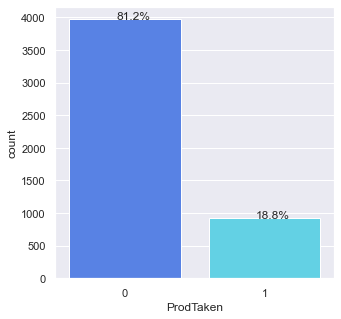

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["ProdTaken"])
perc_on_bar(ax, data["ProdTaken"])

- Only 18.8% of the customers have taken the product as opposed to 81.2% of customers who did not take the product. Hence it is an imbalanced classification

### 2. Age

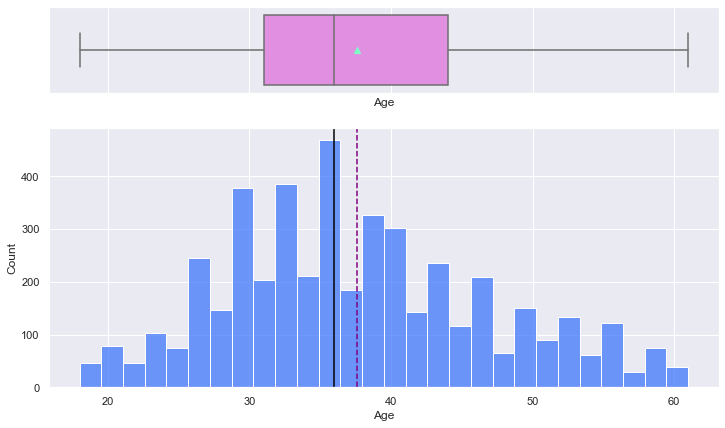

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "Age")

- Age is normally distributed
- No outliers spotted
- Slightly right skewed

### 3. Type of Contact

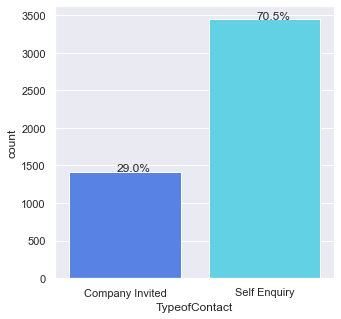

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["TypeofContact"])
perc_on_bar(ax, data["TypeofContact"])

- 70.5% customers self-enquired as opposed to 29% that were invited by the company

### 4. City Tier

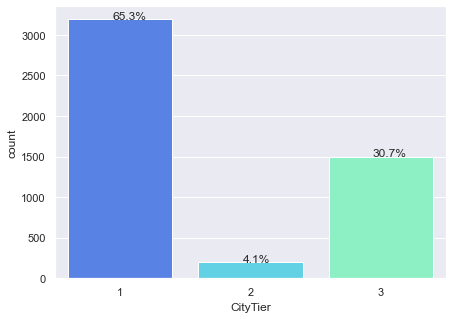

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data["CityTier"])
perc_on_bar(ax, data["CityTier"])

- Maximum number of customers are from Tier 1 cities
- Followed by Tier 3 and Tier 2-
- The distribution of the values suggests City Tier can be treated as a 'category'

### 5. Duration of Pitch

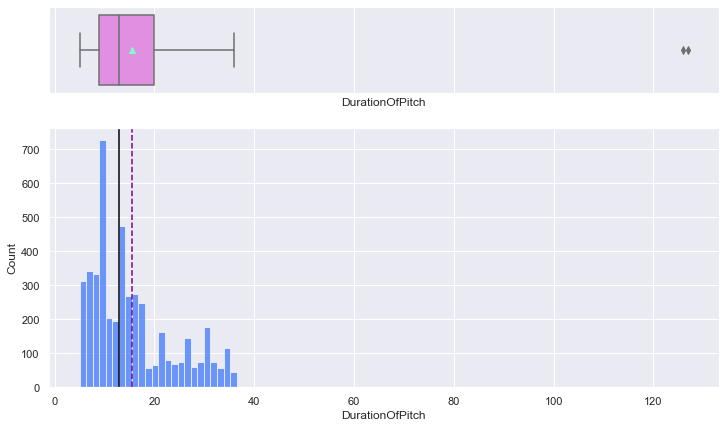

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data, "DurationOfPitch")

- Mean is around 15
- Extreme outliers above 125

### 6. Occupation

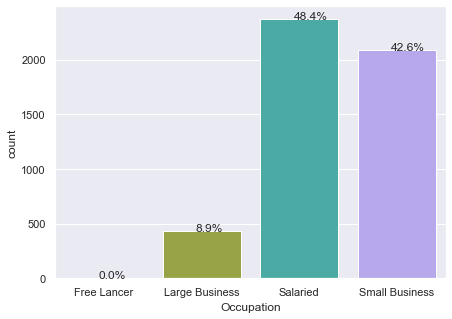

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data["Occupation"])
perc_on_bar(ax, data["Occupation"])

- As seen in the data summary, Salaried customers are large in number, followed by Small business owners
- Only about 9% of Large business owners 
- Only 2 Free lancers as seen from the data analysis

### 7. Gender

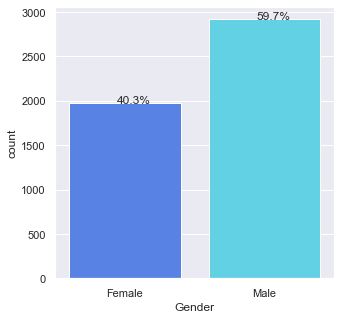

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Gender"])
perc_on_bar(ax, data["Gender"])

- Male customers out number the Female customers

### 8. Number of Person Visiting

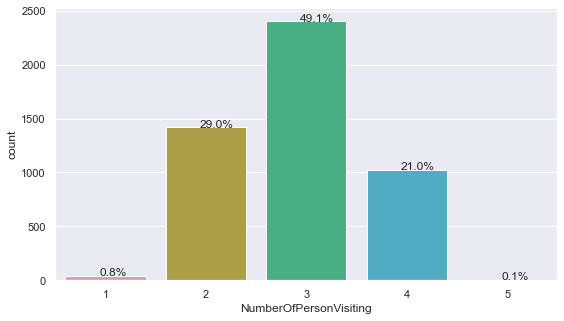

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data["NumberOfPersonVisiting"])
perc_on_bar(ax, data["NumberOfPersonVisiting"])

- 3 persons visiting take up 49.1% of the customers where they could be a family with one child
- 29% includes two persons visiting followed by 21% of 4 persons visiting

### 9. Number of Followups

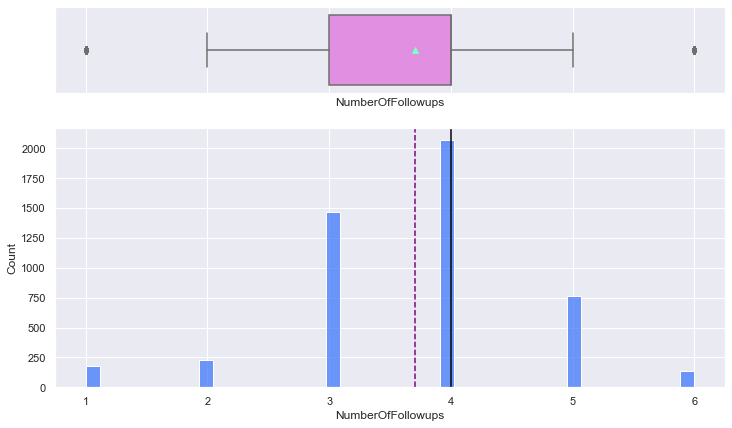

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "NumberOfFollowups")

- Average number of follow ups is 3
- Maximum number of follow ups is 4
- Number of outliers around 1 and 6 

### 10. Product Pitched

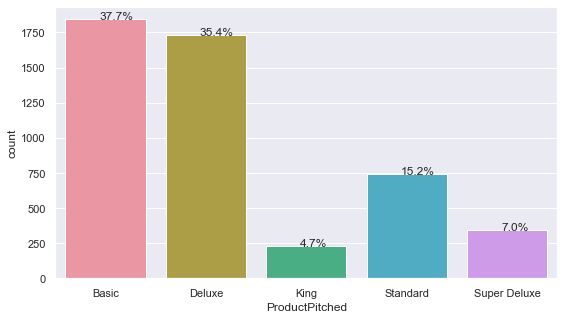

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data["ProductPitched"])
perc_on_bar(ax, data["ProductPitched"])

- 'Basic' package has been pitched for a maximum of 37.7% by the salesperson, followed by 'Deluxe' package with 35%
- 'Standard' package has been pitched 15% times, 'Super Deluxe' 7% times and the 'King' package with the least of 4.7%
- The 'King' package, as the names implies may be the most expensive package offered by the company
- As most of the customers are either salaried or small business owners, it is a possibility that the 'Basic' and 'Deluxe' packages are the ones that are being pitched to them depending on their income

### 11. Preferred Property Star

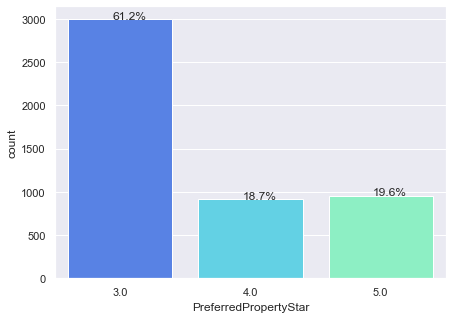

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data["PreferredPropertyStar"])
perc_on_bar(ax, data["PreferredPropertyStar"])

- Customers generally prefer hotels with rating 3 stars and above
- 3 star ratings at 61% are a maximum as opposed to 4 star ratings at 18.7% and 5 star ratings at 19.6%
- It maybe because 4 star and 5 star rated hotels are much expensive in comparison to 3 star rated hotels

### 12. Marital Status

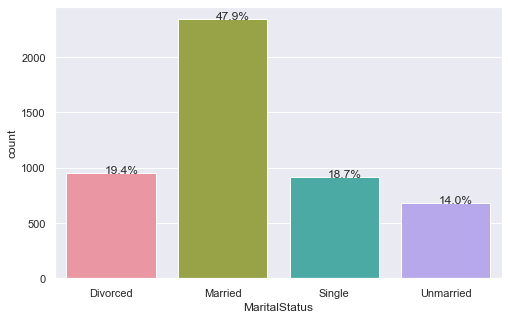

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data["MaritalStatus"])
perc_on_bar(ax, data["MaritalStatus"])

- Married customers are large in number at 47.9%
- Customers with family tend to travel more on a vacation in comparison with divorced, single and unmarried customers

### 13. Number of Trips

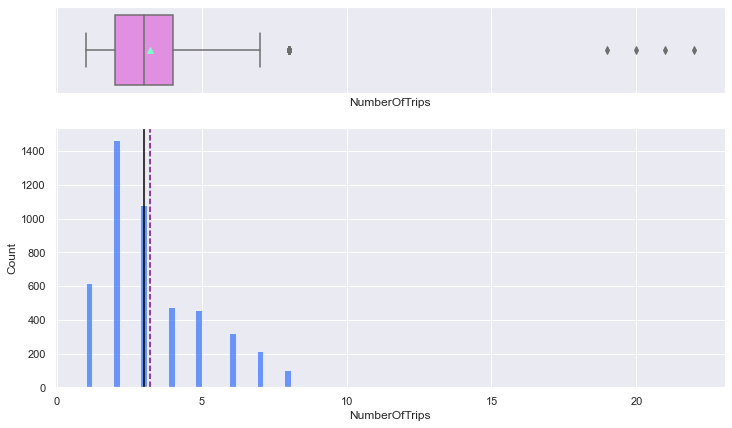

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(data, "NumberOfTrips")

- Maximum number of trips in a year by a customer is 2
- Average number of trips in a year by a customer is 3
- Extreme outliers spotted around 20 times. Maybe they are customers who travel on business purposes.

### 14. Passport

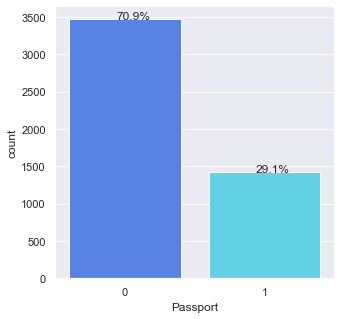

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Passport"])
perc_on_bar(ax, data["Passport"])

- 70.9% of cutsomers do not own a passport as opposed to 29.1%
- This could also be the reason for having a large number of customers to be pitched 'Basic' package by the salesperson

### 15. Pitch Satisfaction Score

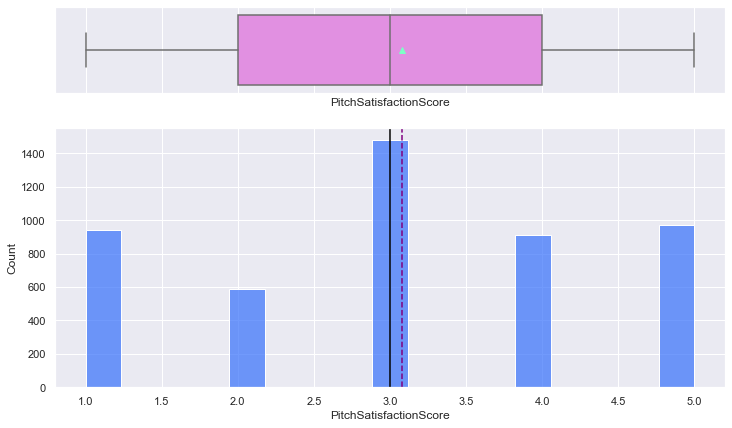

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(data, "PitchSatisfactionScore")

- Pitch satisfaction score ranges from 1 to 5
- Mean and median are around 3

### 16. Own Car

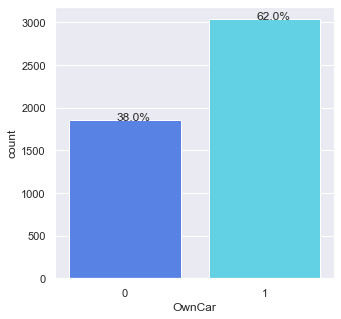

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["OwnCar"])
perc_on_bar(ax, data["OwnCar"])

- 62% of customers own a car as opposed to 38% of customers who do not own a car

### 17. Number of Children Visiting

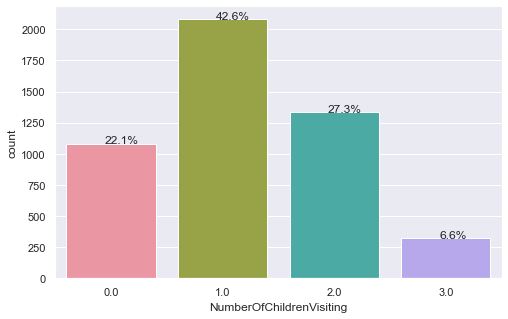

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data["NumberOfChildrenVisiting"])
perc_on_bar(ax, data["NumberOfChildrenVisiting"])

- 42.6% of times there is atleast one child travelling with the customer
- 27.3% of times there is atleast two children travelling with the customer
- whereas 22.1% of times, the customers travel without any kids

### 18. Designation

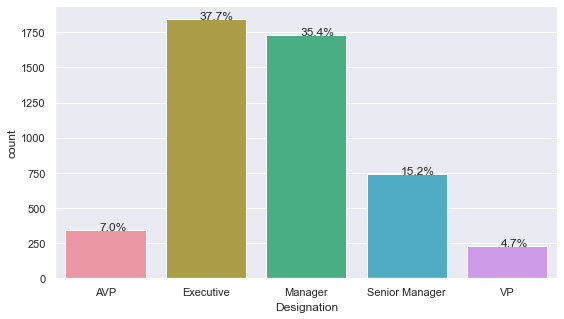

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data["Designation"])
perc_on_bar(ax, data["Designation"])

- There are a maximum of 37.7% of customers who are Executives, followed by 35.4% of customers who are Managers.
- There are 15.2% of customers who are Senior Managers 
- 7% AVPs and 4.7% VPs

### 19. Monthly Income

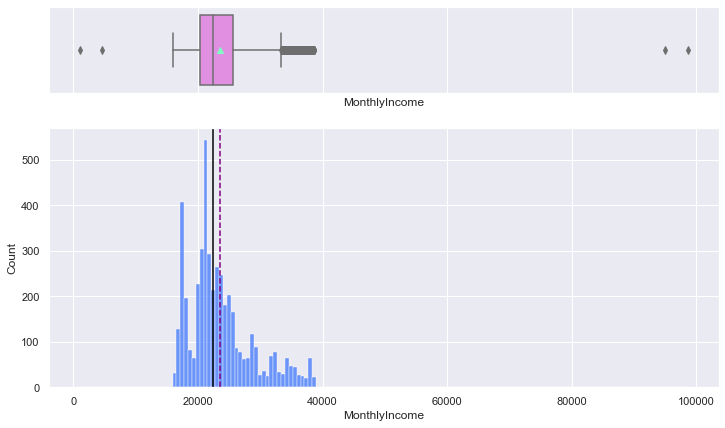

<IPython.core.display.Javascript object>

In [43]:
histogram_boxplot(data, "MonthlyIncome")

- Extreme outliers spotted around Rs.1000 and Rs.1 Lakh
- Mean is around Rs.23000

# Bivariate Analysis

In [44]:
# User defined function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """Print the category counts and plot a stacked bar chart
    data : dataframe
    predictor : independent variable
    target : target variable"""

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.show()

<IPython.core.display.Javascript object>

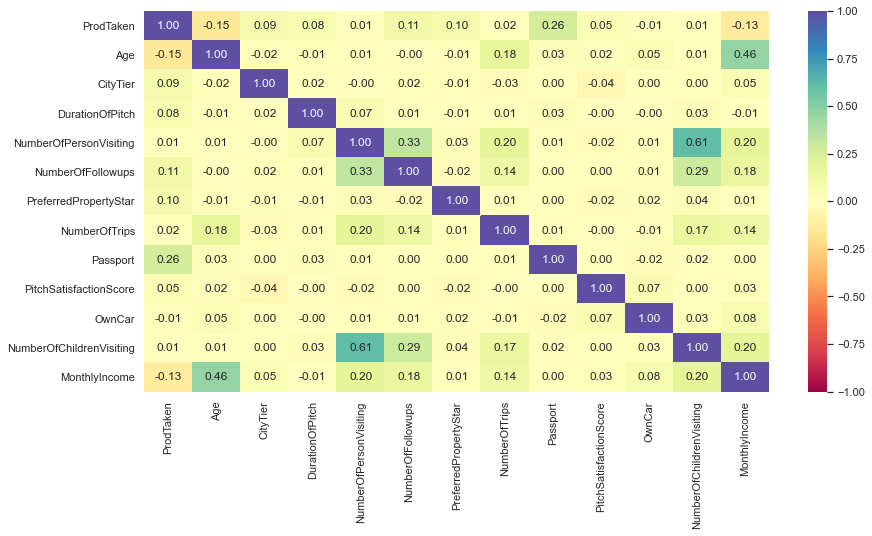

<IPython.core.display.Javascript object>

In [45]:
data1 = data.copy().drop("CustomerID", axis=1)
plt.figure(figsize=(14, 7))
sns.heatmap(data1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Number of person visiting is in positive correlation with the number of children visiting
- Monthly income is positively correlated to Age. As Age increases, experience increases and hence income is higher with age
- Product taken is moderately correlated with Passport and Number of followups, Preferred property star
- Product taken is negatively correlated with Age and Monthly income
- Monthly income, Number of trips and Number of followups are moderately correlated with Number of people visiting
- Monthly income is in moderate correlation with Number of children visiting

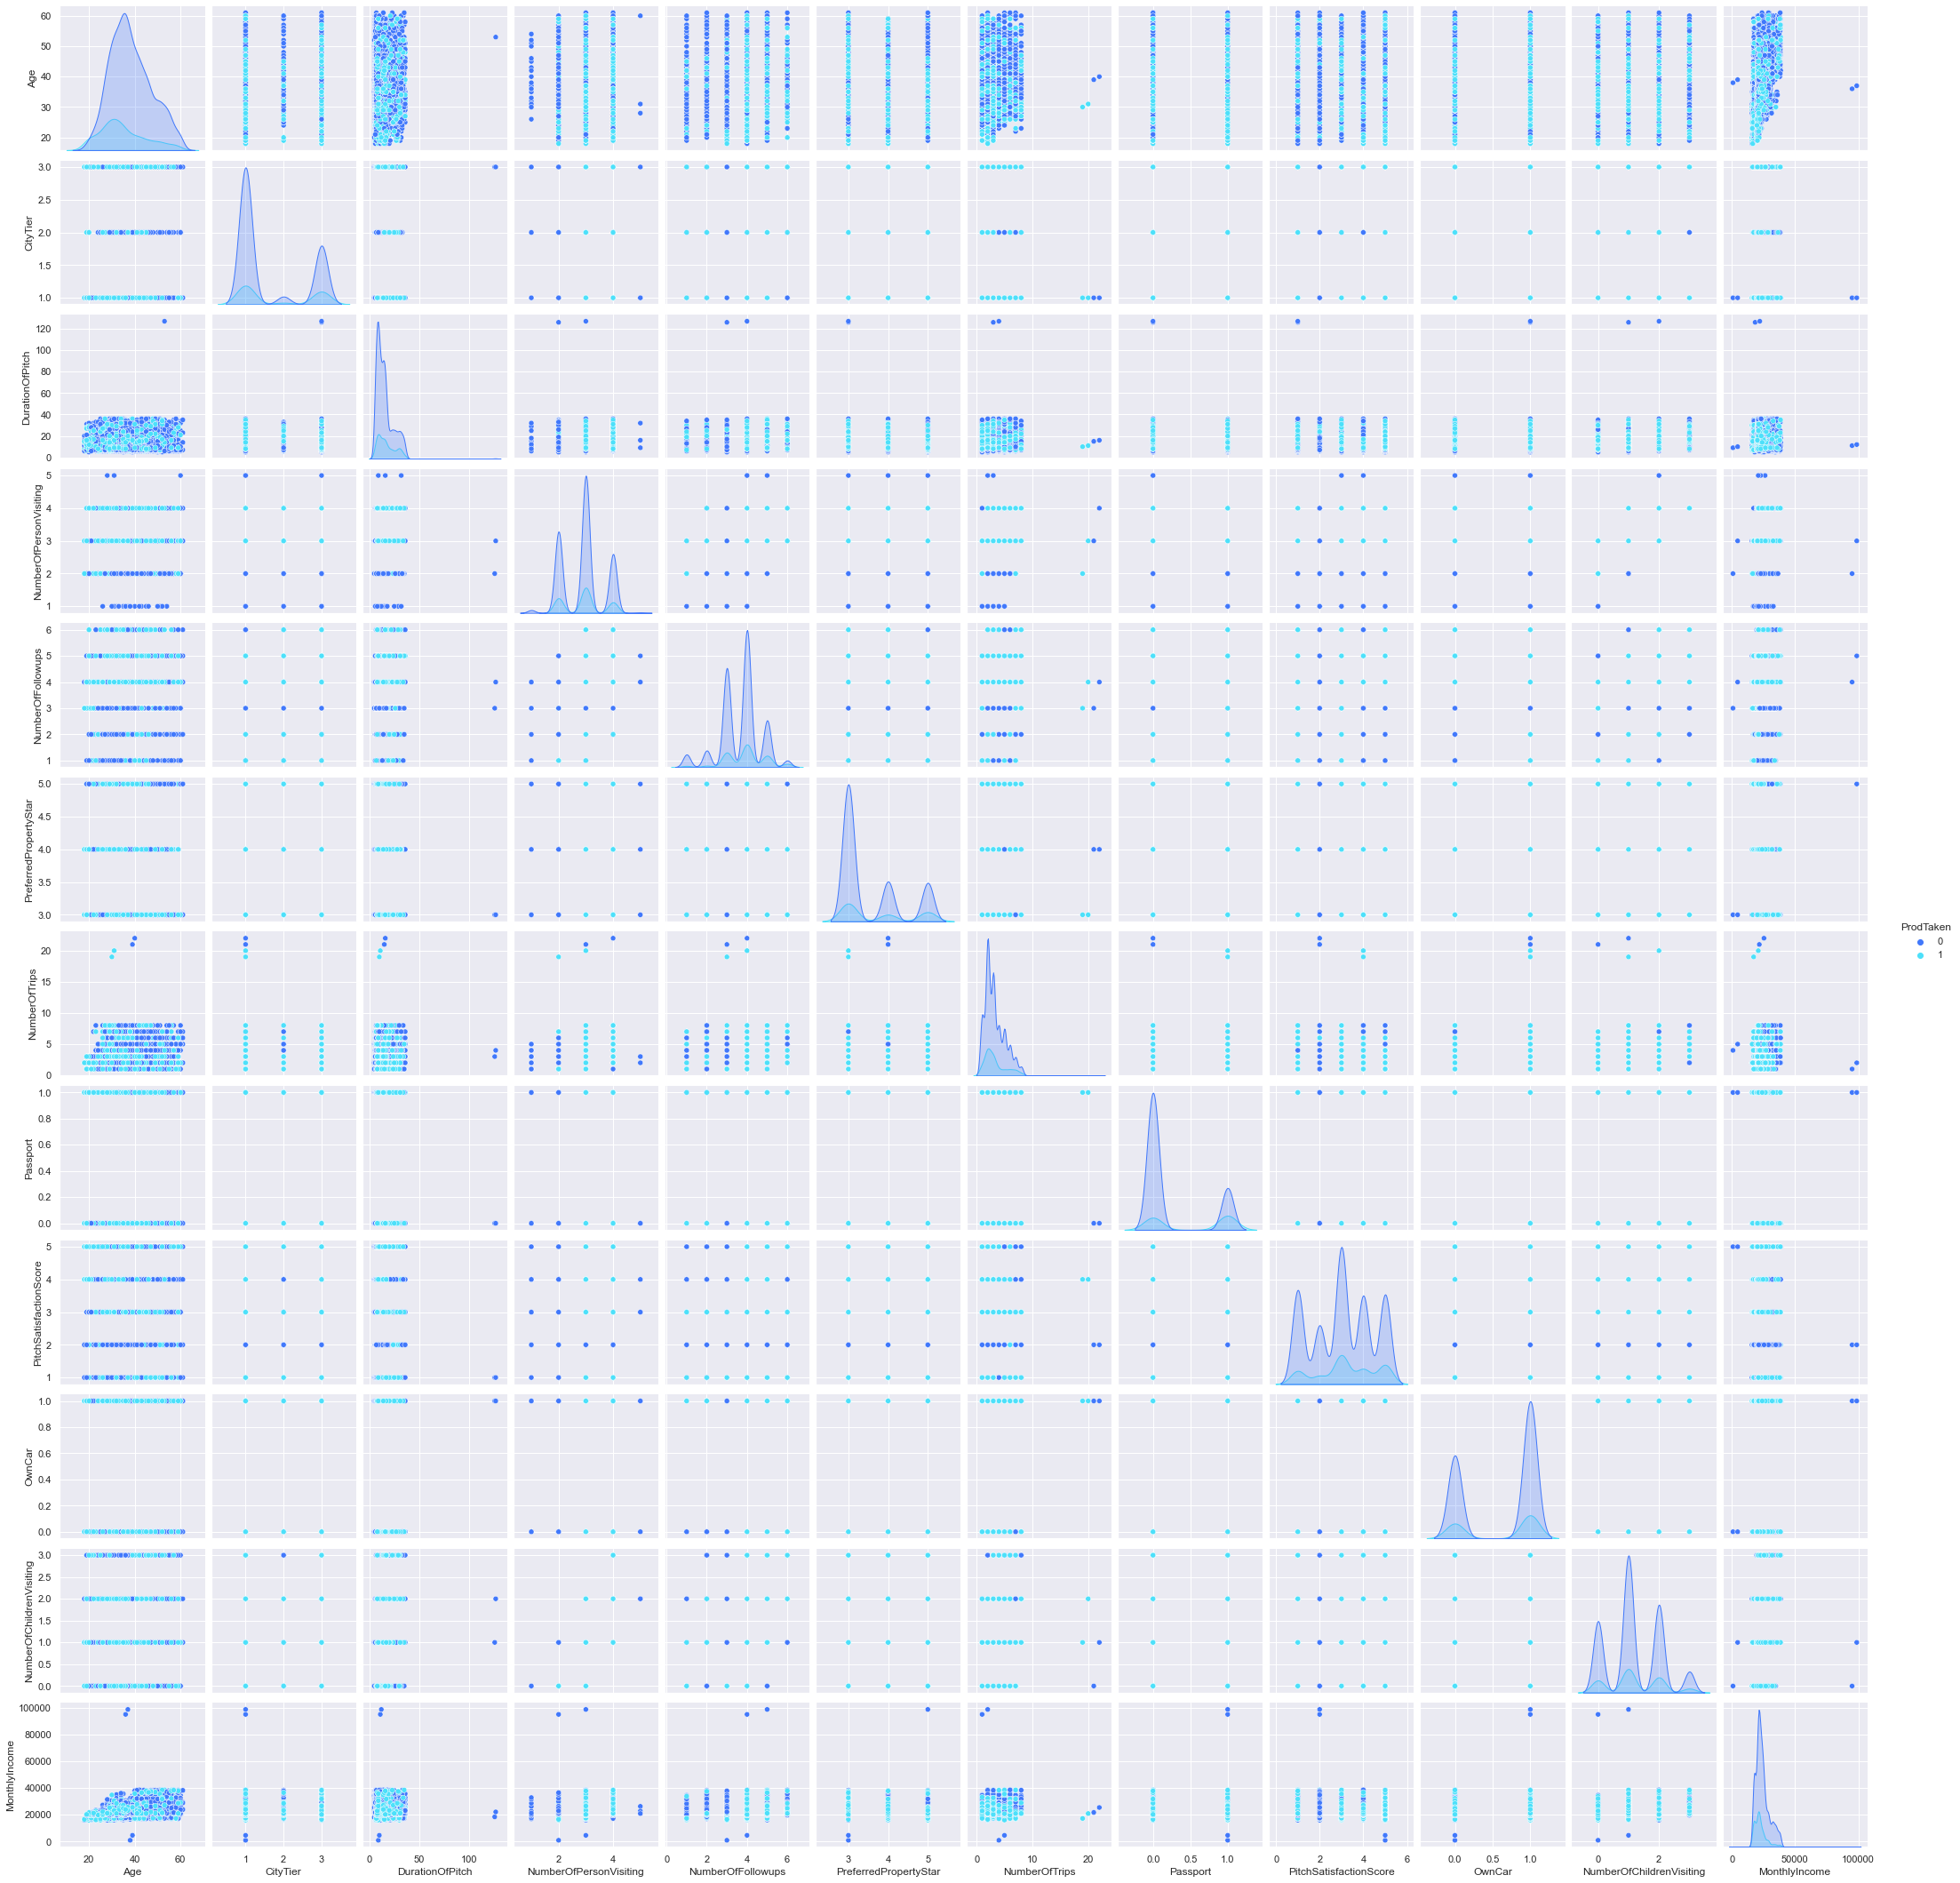

<IPython.core.display.Javascript object>

In [46]:
sns.pairplot(data1, hue="ProdTaken")
plt.show()

- Varying distributions of Product taken across different features is visible, which needs further analysis

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

<IPython.core.display.Javascript object>

### Product taken vs Customer information data

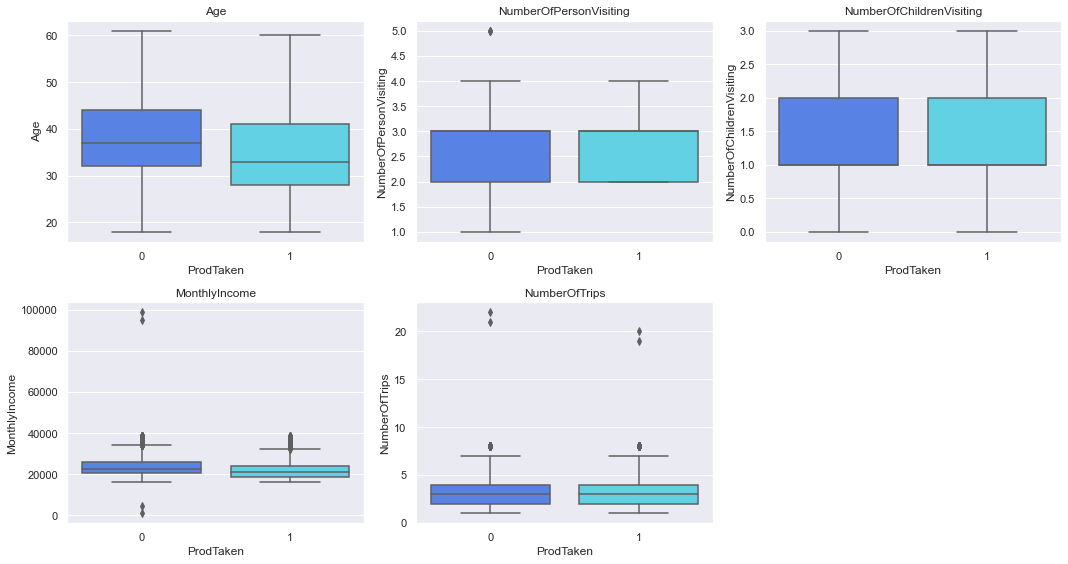

<IPython.core.display.Javascript object>

In [48]:
cust_info_cols1 = data[
    [
        "Age",
        "NumberOfPersonVisiting",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
        "NumberOfTrips",
    ]
]

plt.figure(figsize=(15, 8))

for i, variable in enumerate(cust_info_cols1):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data["ProdTaken"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Customers in Age range 28 to 42 seems to have purchased the travel package more in number
- Large number customers who purchased the travel packages travelled in a group of 2 to 3, with an upper whisker at 4
- The boxplot indicates that customers who purchased the package travel anywhere between 2 to 4 times per year
- Large number of customers are accompanied by atleast 1 to 2 kids
- Customers with a minimum monthly income of about 18K/per month and above, seem to show much interest in purchasing travel packages

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972


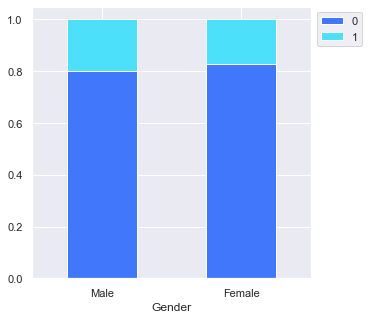

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(data, "Gender", "ProdTaken")

- 578 out of 2916 Male customers have purchased a travel package
- 342 out of 1972 Female customers have purchased a travel package

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950


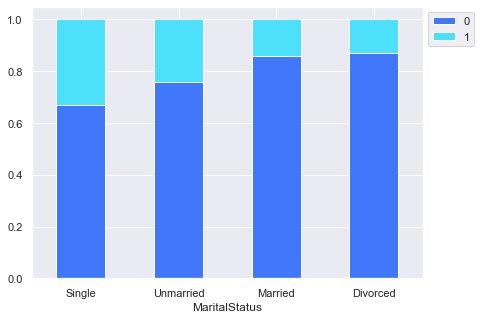

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(data, "MaritalStatus", "ProdTaken")

- The highest percentage of customers who actually purchased a package are single
- Second highest are unmarried customers
- Lastly are the married and divorced customers

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2


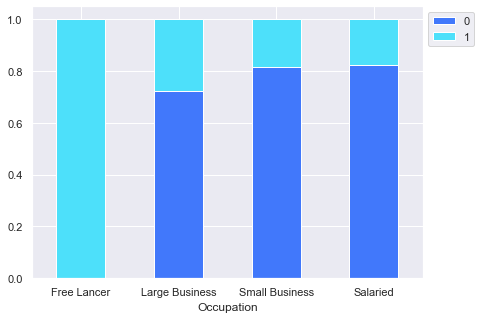

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(data, "Occupation", "ProdTaken")

- From the previous analysis, it was seen that Free Lancer customers are too low in number. From this plot it is evident that there are only 2 Free Lancer customers and that they have both bought a travel package.
- Customers who are large business owners have purchased highest number of packages
- Followed equally by small business and salaried customers

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230


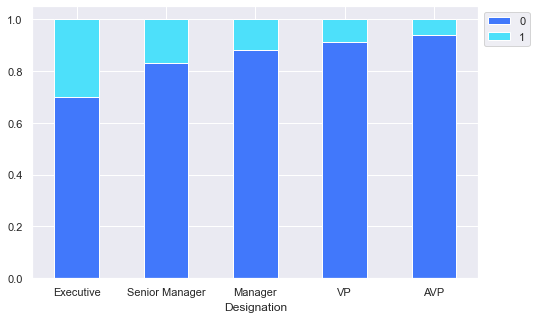

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(data, "Designation", "ProdTaken")

- Customers who are Executives seem to have taken the package in highest number followed by Senior Managers and Managers
- VP and AVP are considerably low in number

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198


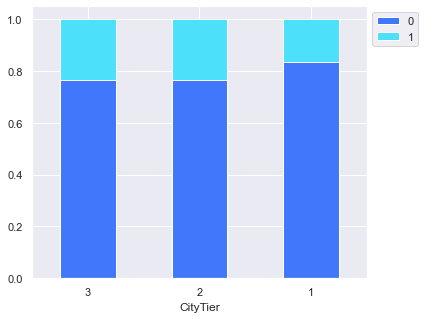

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data, "CityTier", "ProdTaken")

- More number of customers from Tier2 and Tier3 cities seem to have purchased travel package in more number in comparison with Tier1

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856


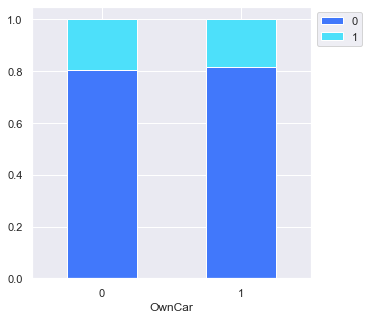

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(data, "OwnCar", "ProdTaken")

- The percentage of customers who purchased a package is almost the same whether or not they own a car 

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466


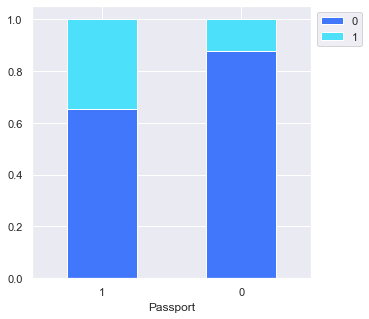

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(data, "Passport", "ProdTaken")

- The percentage of customers who own a passport seem to show more interest in purchasing the travel package in comparison to those who do not own one

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913


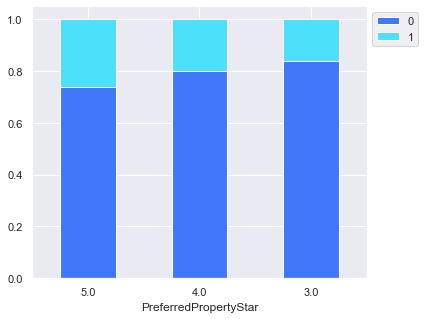

<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(data, "PreferredPropertyStar", "ProdTaken")

- Customers perfer a PropertyStar of 3 and above with highest percentage of customers opting a 5 star

### Product taken vs Customer interaction data

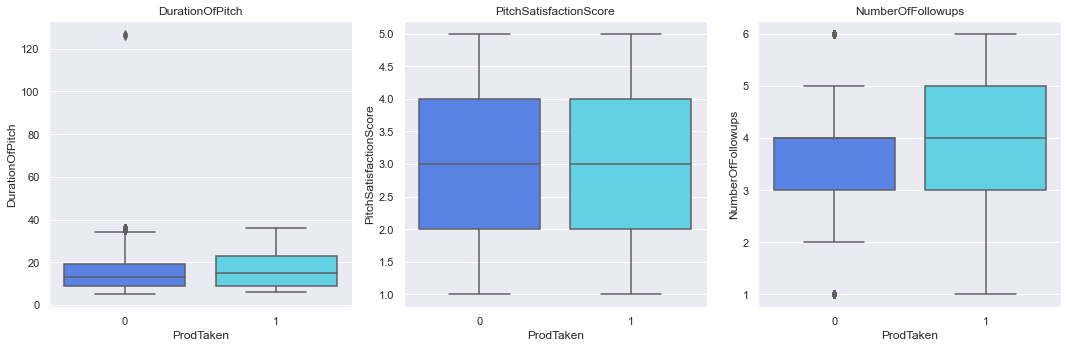

<IPython.core.display.Javascript object>

In [57]:
pitch_cols = data[["DurationOfPitch", "PitchSatisfactionScore", "NumberOfFollowups"]]

plt.figure(figsize=(15, 5))

for i, variable in enumerate(pitch_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data["ProdTaken"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Higher the duration of pitch, customer is more likely to purchase the product
- Pitch satisfaction score does not impact the customer actually purchasing the product
- Interestingly, higher the number of follow ups, more aren the chances of customer purchasing the product

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419


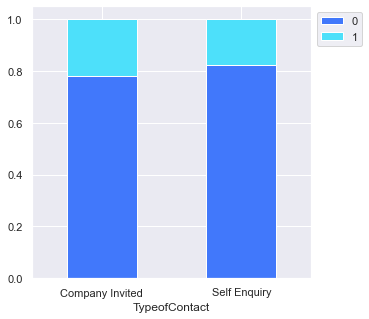

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(data, "TypeofContact", "ProdTaken")

- Customers purchasing a product is almost same for different types of contact

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342


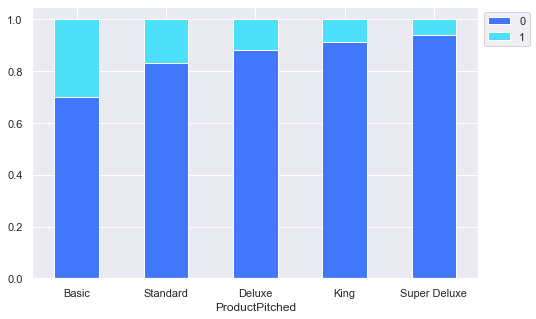

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(data, "ProductPitched", "ProdTaken")

- If the prodcut pitched is 'Basic', then the customer is most likely to purchase the product. Followed by 'Standard' package.
- May be the reason being these two packages are less expensive comparatively.

### Product taken & Product Pitched vs Age, Number of Person Visiting, Number of Children Visiting

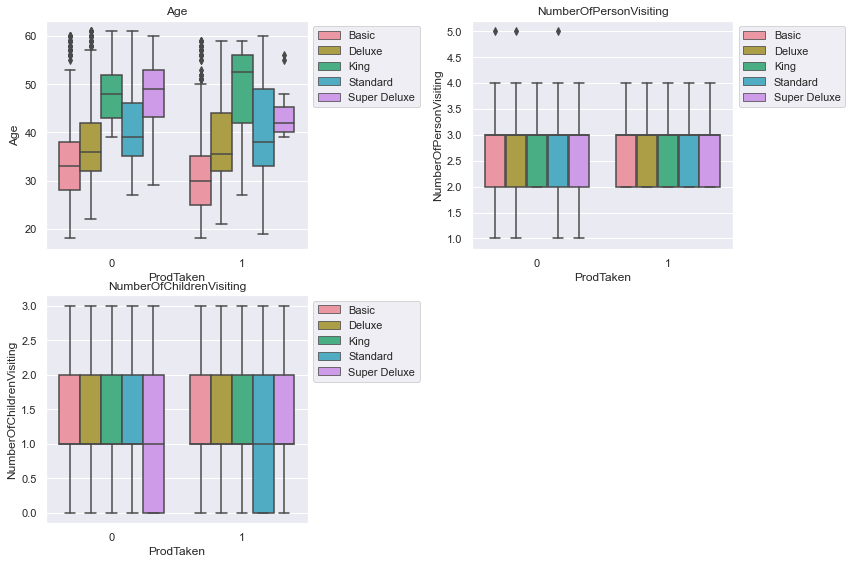

<IPython.core.display.Javascript object>

In [60]:
col1 = data[["Age", "NumberOfPersonVisiting", "NumberOfChildrenVisiting"]]

plt.figure(figsize=(12, 8))

for i, variable in enumerate(col1):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data["ProdTaken"], y=data[variable], hue=data["ProductPitched"])
    plt.tight_layout()
    plt.title(variable)
    plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations

**Age** of the customer w.r.t. package purchased :
- `Basic` - Min 18 and max 50 with IQR between 25 and 35 years of age with outliers until around 60 years
- `Deluxe`- Min 21 and max 59 years ; IQR between 32 to 43 years of age
- `King` - Min 27 to max 59 years ; IQR between 42 to 58 years
- `Standard` - Min 19 to max 61 years ; IQR between 42 to 57 years
- `Super Deluxe` - Min 39 to max 47 years ; IQR between 40 and 45 years with outliers around 55 years

Overall, `Basic` and `Deluxe` packages are preferred by younger customers in comparision to other packages. `King` package is highly preferred by customers above 40 years, `Standard` package is preferred by customers above 33 years and `Super Deluxe` is higly preferred by customers in their 40s

Average **Number of person visiting** with customers who purchased travel packages is between 2 and 3 and it is common across all the different packages available.

**Number of children visiting** is same for customers with `Basic`,`Deluxe`,`King` and `Super Deluxe` packages.

### Product taken & Product Pitched vs Monthly Income, Number of Trips

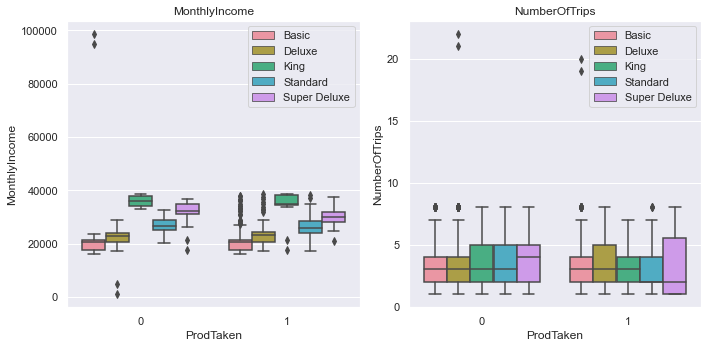

<IPython.core.display.Javascript object>

In [61]:
col2 = data[["MonthlyIncome", "NumberOfTrips"]]

plt.figure(figsize=(10, 5))

for i, variable in enumerate(col2):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=data["ProdTaken"], y=data[variable], hue=data["ProductPitched"])
    plt.tight_layout()
    plt.title(variable)
    plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations

**Monthly Income** of customers across differnt packages : 
- `Basic` - Min 17K to max 36K with outliers until 39K 
- `Deluxe` - Min 18K to max 37K with outliers until 40K
- `King` - Min 35K to max 39K with outliers around 20K
- `Standard` - Min 18K to max 38K with outliers until 40K
- `Super Deluxe` - Min 28K to max 38.5K with outliers around 21K

Overall, customers with an average monthly income around 22K prefer either `Basic` or `Deluxe` packages ; `King` is preferred by customers with an average monthly income above 35K and `Standard` and `Super Deluxe` packages are preferred by customers with an average monthly income between 22K to 35K.
Hence, we can infer that `Basic` and `Standard` packages are very affordable are they are the basic packages. Whereas, `King` is the most expensive package of all followed by `Super Deluxe` and `Standard`

**Number of trips** per year made by customers who have purchased the travel package is :
- For `Basic`,`King` and `Standard` package customers, it is min 1 and max 7 with IQR between 3 and 4 
- `Deluxe` - Min 1 to 8 with an IQR between 3 and 5
- `Super Deluxe` - 1 to 7 with IQR 1 to 6

### Product taken & Product Pitched vs Customer Interaction Data

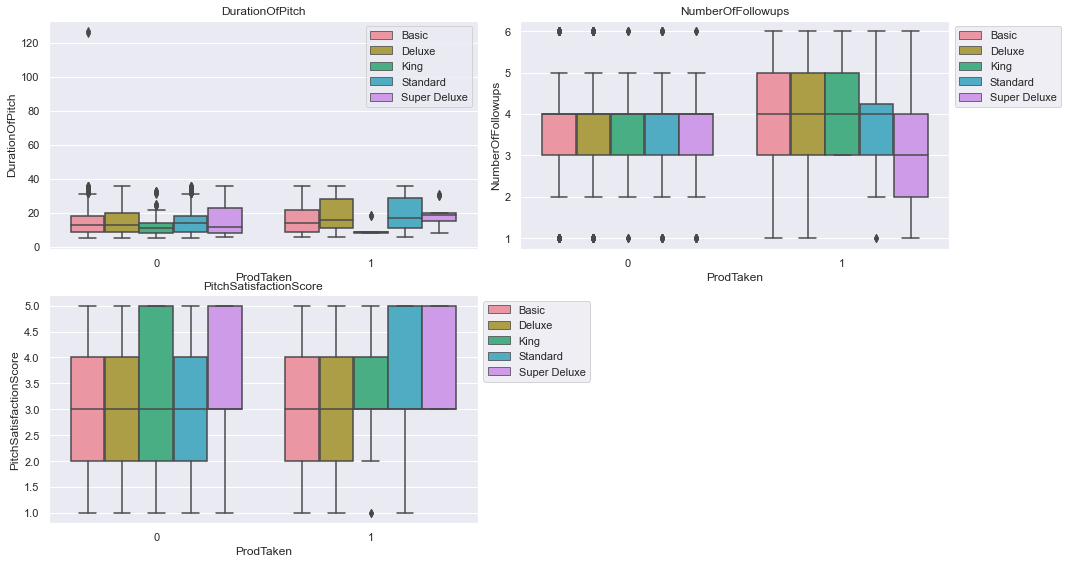

<IPython.core.display.Javascript object>

In [62]:
pitch_cols = data[
    ["DurationOfPitch", "NumberOfFollowups", "PitchSatisfactionScore"]
].columns.tolist()

plt.figure(figsize=(15, 8))

for i, variable in enumerate(pitch_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data["ProdTaken"], y=data[variable], hue=data["ProductPitched"])
    plt.tight_layout()
    plt.title(variable)
    plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations

**Duration of Pitch** to convince a customer to purchase different packages :
- `Basic`- Min 6 mins to max 38 mins ; IQR between 10 to 22 mins
- `Deluxe` - Min 6 to max 38 mins ; IQR between 11 to 35 mins
- `King` - Around 8-9 mins ; outliers around 29 mins
- `Standard` - Min 6 to max 38 mins ; IQR between 11 to 36 mins
- `Super Deluxe` - Min 8 to max 21 mins ; IQR between 15 to 20 mins ; outliers around 30 mins

Overall, more duration is required to convince a customer to purchase `Deluxe` and `Standard` packages 

**Numer of Followups** required to convince a customer to purchase different packages :
- `Basic` - Min 1 to max 6 and IQR between 3 to 5 followups
- `Deluxe` - Same pattern followed for Basic package
- `King` - Min 3 to max 6 and IQR between 3 to 5 followups
- `Standard` - Min 2 to max 6 and IQR between 3 to 4.25 followups ; outliers around 1
- `Super Deluxe` - Min 1 to max 6 and IQR between 2 to 4 followups

Overall, more number of followups more the chances are that a customer will purchase the travel package

**Pitch satisfaction score** acquired across different packages where the customer actually purchased the package :
- `Basic` & `Deluxe` - Min 1 to max 5 ; IQR between 2 to 4
- `King` - Min 2 to max 5 ; IQR between 3 and 4 ; outliers around 1
- `Standard` - Ranges from 1 ; IQR between 3 and 5 
- `Super Deluxe` - IQR between 3 and 5

The pitch satisfaction score is for `Basic` and `Deluxe` packages are the same irrespective of the customer purchasing the package. Maybe the marketing team has to work on it.
Overall, for `King`, `Standard` and `Super Deluxe` packages, the customers who purchased the packages have given a better satisfaction score than the customers who have not purchased the package.

# Building Customer Profile for different packages

In [63]:
# creating a new dataframe df where the package was actually purchased by the customer
df = data[data["ProdTaken"] == 1]
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
14,200014,1,28.0,Self Enquiry,1,30.0,Salaried,Male,2,4.0,Basic,3.0,Single,6.0,1,2,0,0.0,Executive,17028.0
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
24,200024,1,34.0,Self Enquiry,1,12.0,Small Business,Male,2,3.0,Basic,5.0,Single,3.0,0,2,1,1.0,Executive,17960.0


<IPython.core.display.Javascript object>

## Grouping data w.r.t different travel packages to build customer profile

### Listing the statistical summary w.r.t. to the package taken

In [64]:
df[df["ProductPitched"] == "Basic"].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,552.0,202605.467391,1445.951867,200002.0,201387.25,202444.5,203825.75,204887.0
ProdTaken,552.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,515.0,31.289320,9.070829,18.0,25.00,30.0,35.00,59.0
CityTier,552.0,1.510870,0.832566,1.0,1.00,1.0,2.00,3.0
DurationOfPitch,532.0,15.791353,7.906926,6.0,9.00,14.0,22.00,36.0
NumberOfPersonVisiting,552.0,2.905797,0.701439,2.0,2.00,3.0,3.00,4.0
NumberOfFollowups,548.0,3.950730,0.967166,1.0,3.00,4.0,5.00,6.0
PreferredPropertyStar,552.0,3.771739,0.861812,3.0,3.00,3.0,5.00,5.0
NumberOfTrips,547.0,3.226691,2.081618,1.0,2.00,3.0,4.00,20.0
Passport,552.0,0.583333,0.493454,0.0,0.00,1.0,1.00,1.0


<IPython.core.display.Javascript object>

In [65]:
df[df["ProductPitched"] == "Standard"].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,124.0,202621.693548,1453.911893,200050.0,201444.75,202467.5,203856.25,204885.0
ProdTaken,124.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,123.0,41.008130,9.876695,19.0,33.00,38.0,49.00,60.0
CityTier,124.0,2.096774,0.966255,1.0,1.00,3.0,3.00,3.0
DurationOfPitch,123.0,19.065041,9.048811,6.0,11.00,17.0,29.00,36.0
NumberOfPersonVisiting,124.0,2.967742,0.709236,2.0,2.00,3.0,3.00,4.0
NumberOfFollowups,124.0,3.935484,0.908335,1.0,3.00,4.0,4.25,6.0
PreferredPropertyStar,123.0,3.731707,0.878460,3.0,3.00,3.0,5.00,5.0
NumberOfTrips,123.0,3.016260,1.815163,1.0,2.00,2.0,4.00,8.0
Passport,124.0,0.387097,0.489062,0.0,0.00,0.0,1.00,1.0


<IPython.core.display.Javascript object>

In [66]:
df[df["ProductPitched"] == "Deluxe"].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,204.0,202596.872549,1454.182002,200000.0,201388.5,202441.5,203819.5,204883.0
ProdTaken,204.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,198.0,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
CityTier,204.0,2.411765,0.913532,1.0,1.0,3.0,3.0,3.0
DurationOfPitch,180.0,19.100000,9.227176,6.0,11.0,16.0,28.0,36.0
NumberOfPersonVisiting,204.0,2.950980,0.707141,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,200.0,3.970000,1.051011,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,203.0,3.699507,0.857899,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,202.0,3.702970,2.022483,1.0,2.0,3.0,5.0,8.0
Passport,204.0,0.490196,0.501134,0.0,0.0,0.0,1.0,1.0


<IPython.core.display.Javascript object>

In [67]:
df[df["ProductPitched"] == "Super Deluxe"].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,20.0,202834.600000,1452.761958,200706.0,201937.75,202785.5,203905.25,204865.0
ProdTaken,20.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,20.0,43.500000,4.839530,39.0,40.00,42.0,45.25,56.0
CityTier,20.0,2.600000,0.820783,1.0,3.00,3.0,3.00,3.0
DurationOfPitch,20.0,18.500000,7.330542,8.0,15.00,18.5,20.00,31.0
NumberOfPersonVisiting,20.0,2.700000,0.656947,2.0,2.00,3.0,3.00,4.0
NumberOfFollowups,20.0,3.100000,1.618967,1.0,2.00,3.0,4.00,6.0
PreferredPropertyStar,20.0,3.600000,0.820783,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,19.0,3.263158,2.490919,1.0,1.00,2.0,5.50,8.0
Passport,20.0,0.600000,0.502625,0.0,0.00,1.0,1.00,1.0


<IPython.core.display.Javascript object>

In [68]:
df[df["ProductPitched"] == "King"].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,20.0,202529.900000,1492.553407,200045.0,201364.50,202430.5,203507.5,204816.0
ProdTaken,20.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Age,20.0,48.900000,9.618513,27.0,42.00,52.5,56.0,59.0
CityTier,20.0,1.800000,1.005249,1.0,1.00,1.0,3.0,3.0
DurationOfPitch,20.0,10.500000,4.135851,8.0,8.00,9.0,9.0,19.0
NumberOfPersonVisiting,20.0,2.900000,0.718185,2.0,2.00,3.0,3.0,4.0
NumberOfFollowups,20.0,4.300000,1.128576,3.0,3.00,4.0,5.0,6.0
PreferredPropertyStar,16.0,3.750000,0.683130,3.0,3.00,4.0,4.0,5.0
NumberOfTrips,17.0,3.411765,1.938389,1.0,2.00,3.0,4.0,7.0
Passport,20.0,0.600000,0.502625,0.0,0.00,1.0,1.0,1.0


<IPython.core.display.Javascript object>

### Package vs Categorical data

Gender          Female  Male  All
ProductPitched                   
All                342   578  920
Basic              208   344  552
Deluxe              70   134  204
Standard            48    76  124
King                12     8   20
Super Deluxe         4    16   20


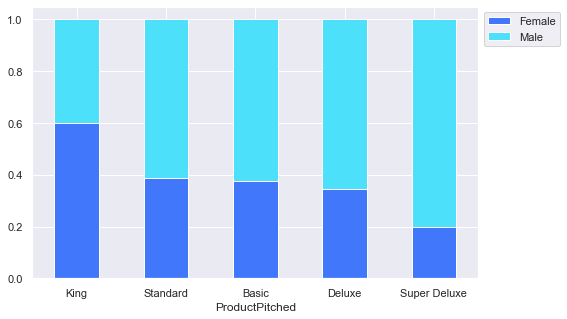

<IPython.core.display.Javascript object>

In [69]:
stacked_barplot(df, "ProductPitched", "Gender")

- On an average Male customers have largely purchased `Basic`,`Standard`,`Deluxe` and `Super Deluxe` packages
- Comparatively Female customers have shown much interest in `King` package

MaritalStatus   Divorced  Married  Single  Unmarried  All
ProductPitched                                           
All                  124      326     304        166  920
Basic                 60      188     230         74  552
Deluxe                32       68      45         59  204
Standard              26       56      11         31  124
King                   6        6       8          0   20
Super Deluxe           0        8      10          2   20


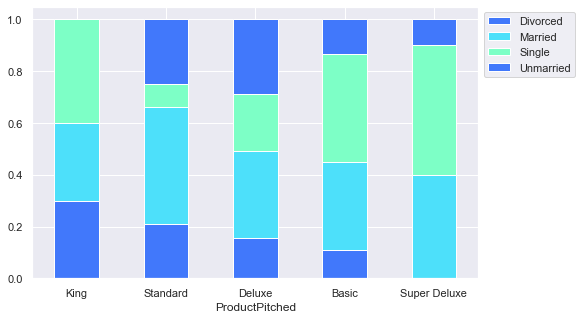

<IPython.core.display.Javascript object>

In [70]:
stacked_barplot(df, "ProductPitched", "MaritalStatus")

- Married customers highly prefer `Standard` and `Deluxe` packages
- Single customers highly prefer `Basic`, `Super Deluxe` and `King` packages
- Unmarried customers generally prefer `Basic` and `Deluxe` packages
- Divorced customers generally prefer the `Basic` package

Occupation      Free Lancer  Large Business  Salaried  Small Business  All
ProductPitched                                                            
Basic                     2              88       260             202  552
All                       2             120       414             384  920
Deluxe                    0              16        80             108  204
King                      0               4         4              12   20
Standard                  0              12        54              58  124
Super Deluxe              0               0        16               4   20


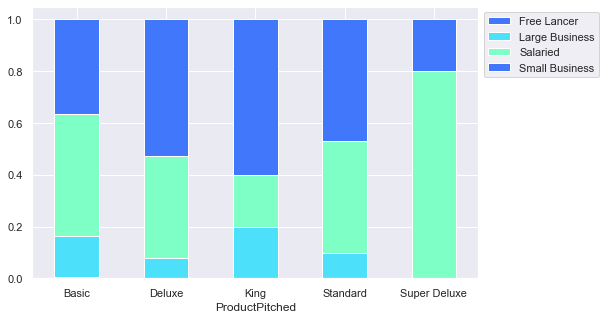

<IPython.core.display.Javascript object>

In [71]:
stacked_barplot(df, "ProductPitched", "Occupation")

- `Basic` package is largely preferred by Free lancer and Large business customers
- `Deluxe`, `King` and `Standard` packages are highly purchased by Small business customers
- `Super Deluxe` package is preferred by Salaried customers

Designation     AVP  Executive  Manager  Senior Manager  VP  All
ProductPitched                                                  
King              0          0        0               0  20   20
All              20        552      204             124  20  920
Basic             0        552        0               0   0  552
Deluxe            0          0      204               0   0  204
Standard          0          0        0             124   0  124
Super Deluxe     20          0        0               0   0   20


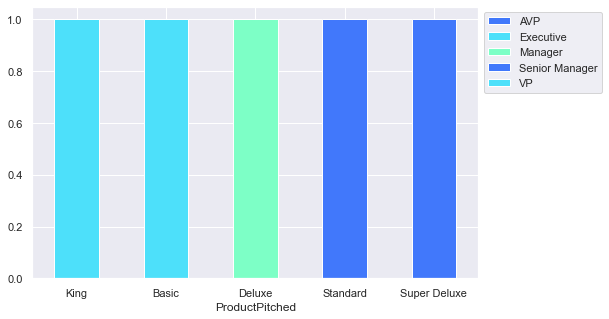

<IPython.core.display.Javascript object>

In [72]:
stacked_barplot(df, "ProductPitched", "Designation")

- Customers who purchased the travel package `King` are mostly VPs,`Basic` are mostly Executives, `Deluxe` are Managers, `Standard` are Senior Managers and `Super Deluxe` are AVPs.
- The price range of the packages offered from low to high are namely `Basic, Deluxe, Standard, Super Deluxe and King` that can be inferred from the designation of the customers w.r.t. their income

CityTier          1   2    3  All
ProductPitched                   
All             520  46  354  920
Basic           392  38  122  552
Standard         52   8   64  124
Deluxe           60   0  144  204
King             12   0    8   20
Super Deluxe      4   0   16   20


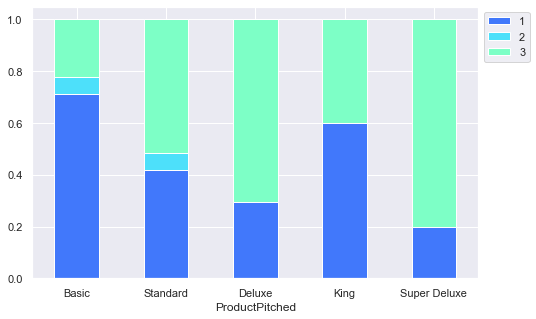

<IPython.core.display.Javascript object>

In [73]:
stacked_barplot(df, "ProductPitched", "CityTier")

- Customers who purchased `Basic` and `King` packages are mostly from Tier 1 cities
- Customers who purchased `Standard, Deluxe and Suoer Deluxe` packages are mostly from Tier 3 cities
- Customers from Tier 2 cities generally prefer the `Basic` package

TypeofContact   Company Invited  Self Enquiry  All
ProductPitched                                    
All                         310           607  917
Basic                       194           355  549
Deluxe                       68           136  204
Standard                     32            92  124
Super Deluxe                 16             4   20
King                          0            20   20


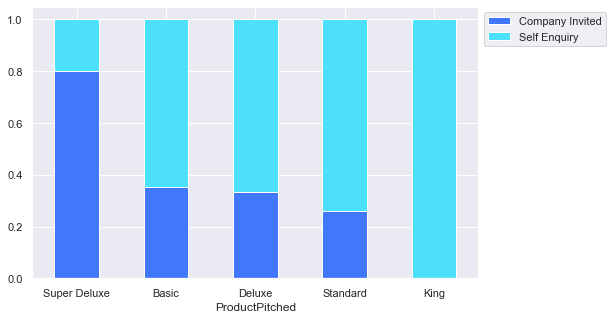

<IPython.core.display.Javascript object>

In [74]:
stacked_barplot(df, "ProductPitched", "TypeofContact")

- `Basic, Deluxe and Standard` customers are mostly by their personal interest (Self enquiry)
- `Super Deluxe` customers are mostly company invited
- Customers who purchased the `King` package are all Self-enquired

Passport          0    1  All
ProductPitched               
All             426  494  920
Basic           230  322  552
Deluxe          104  100  204
Standard         76   48  124
King              8   12   20
Super Deluxe      8   12   20


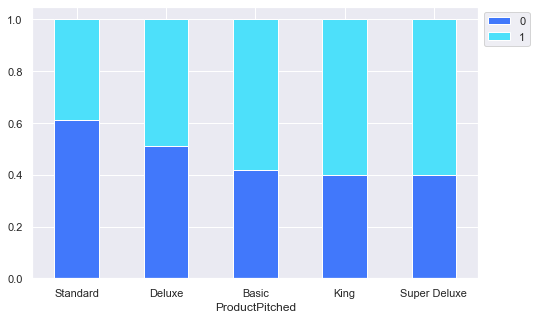

<IPython.core.display.Javascript object>

In [75]:
stacked_barplot(df, "ProductPitched", "Passport")

- 50% of the customers choosing `Basic, King and Super Deluxe` packages have passport
- Comparatively high proportion of the `Standard and Super Deluxe` customers do not own a passport

OwnCar            0    1  All
ProductPitched               
All             360  560  920
Basic           236  316  552
Deluxe           80  124  204
Standard         42   82  124
King              2   18   20
Super Deluxe      0   20   20


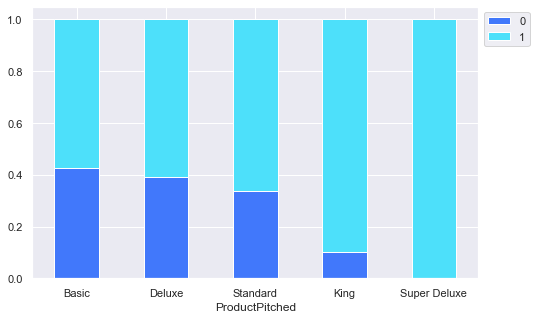

<IPython.core.display.Javascript object>

In [76]:
stacked_barplot(df, "ProductPitched", "OwnCar")

- All `Super Deluxe` customers own a car
- Most of the `King` customers own a car
- About half the `Basic and Deluxe` customers do not own a car 

# Customer Characteristics based on different travel packages

## BASIC package 

- `Age` - Early 20s to early 30s
- `Type of contact` - Self enquiry
- `City Tier` - Mostly from tier 1
- `Occupation` - Salaried
- `Designation` - Mostly preferred by Executives
- `Gender` - Preferred by Male customers
- `Marital status` - Single
- `Number of person visiting` - 2 to 3 on an average
- `Number of children visiting` - 1 kid on an average
- `Passport` - 50% of the customers have a passport
- `Own car` - 50% of the customers own a car
- `Preferred property star` - 3 star and above
- `Number of trips` - 3 trips per year on an average ; Min 1 to max 20 trips/year
- `Monthly Income` - An average of 20K per month

## STANDARD package 

- `Age` - Early 30s to late 40s
- `Type of contact` - Mostly self enquiry
- `City Tier` - Mostly from tier 3
- `Occupation` - Small business owners and Salaried customers
- `Designation` - Senior Managers
- `Gender` - Preferred by Male customers
- `Marital status` - Married
- `Number of person visiting` - 2 to 3 on an average
- `Number of children visiting` - 1 kid on an average
- `Passport` - Most of them do not have a passport
- `Own car` - 50% of the customers do not own a car
- `Preferred property star` - 3 star and above
- `Number of trips` - 3 trips per year on an average ; Min 1 to max 8 trips/year
- `Monthly Income` - An average of 26K per month

## DELUXE package 

- `Age` - Early 30s to late 50s
- `Type of contact` - Only Self enquiry
- `City Tier` - Mostly from tier 3
- `Occupation` - Small business
- `Designation` - Managers
- `Gender` - Preferred by Male customers
- `Marital status` - Married
- `Number of person visiting` - 3 on an average
- `Number of children visiting` - 1 kid on an average
- `Passport` - 50% of the customers do not have a passport
- `Own car` - 75% of the customers do own a car
- `Preferred property star` - 3 star and above
- `Number of trips` - 3 trips per year on an average ; Min 1 to max 8 trips/year
- `Monthly Income` - An average of 23K per month

## SUPER DELUXE package 

- `Age` - Early 30s to late 40s
- `Type of contact` - Company invited
- `City Tier` - Mostly from tier 3
- `Occupation` - Salaried customers
- `Designation` - AVP
- `Gender` - Preferred by Male customers
- `Marital status` - Single
- `Number of person visiting` - 2 to 3 on an average
- `Number of children visiting` - 1 kid on an average
- `Passport` - Most of the customers have passport
- `Own car` - All customers own a car
- `Preferred property star` - 3 star and above
- `Number of trips` - 3 trips per year on an average ; Min 1 to 8 trips/year
- `Monthly Income` - An average of 29K per month

## KING package 

- `Age` - Early 40s to late 50s
- `Type of contact` - Self enquiry
- `City Tier` - Mostly from tier 1
- `Occupation` - Small business
- `Designation` - VP
- `Gender` - Preferred by Female customers
- `Marital status` - Single
- `Number of person visiting` - 3 on an average
- `Number of children visiting` - 1 kid on an average
- `Passport` - Most of the customers have a passport
- `Own car` - Most of the customers do own a car
- `Preferred property star` - 4 star and above
- `Number of trips` - 2 trips per year on an average ; Min 1 to 7 trips/year
- `Monthly Income` - An average of 34K per month

# Key Insights from EDA

Characteristics of customers who seem to be more interested in purchasing the travel package include :

- customers aged between the late 20s and early 40s
- customers who travel in a group of 2 to 4 which includes one child (on average)
- customers from Tier2 and Tier3 cities
- customers who own a passport
- customers who are mostly Executives and Managers
- customers who mostly bought the 'Basic' package after they were pitched
- Female customers with a higher designation seem to be interested in the 'King' package, whereas Male customers show interest in the 'Super Deluxe'
- Single, unmarried and divorced customers highly prefer 'Basic' package while married customers prefer more expensive packages, comparatively
- On average, customers who were followed up three times and above are most likely to purchase the product along with a higher duration of pitch
- gender, number of children visiting, and owning a car - these factors do not add any significance to the chances of the product being purchased
- On average, customers who tend to travel three times and above, annually, are more likely to purchase the product
- customers with an average monthly income ranging between 20K - 25K opt opt for Basic and Standard packages, 23K - 30K opt for Deluxe and Super Deluxe packages and above 33K prefer the King package

# Missing Value Treatment

In [77]:
# checking again for missing values
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

In [78]:
# Checking the Age of a customer w.r.t their Designation, Gender and Marital Status

data.groupby(["Designation", "Gender", "MaritalStatus"])["Age"].median()

Designation     Gender  MaritalStatus
AVP             Female  Divorced         47.0
                        Married          48.0
                        Single           53.0
                        Unmarried        40.0
                Male    Divorced         49.5
                        Married          50.0
                        Single           48.0
                        Unmarried        39.0
Executive       Female  Divorced         34.0
                        Married          33.0
                        Single           30.0
                        Unmarried        33.0
                Male    Divorced         32.0
                        Married          32.0
                        Single           30.0
                        Unmarried        32.0
Manager         Female  Divorced         36.0
                        Married          38.0
                        Single           35.5
                        Unmarried        36.0
                Male    Divorced         3

<IPython.core.display.Javascript object>

In [79]:
# Imputing the missing values in Age with the median values as shown in the above analysis

data["Age"] = data.groupby(["Designation", "Gender", "MaritalStatus"])["Age"].transform(
    lambda x: x.fillna(x.mean())
)

<IPython.core.display.Javascript object>

In [80]:
# checking the highest occuring category in Type of contact

data["TypeofContact"].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

<IPython.core.display.Javascript object>

In [81]:
# Imputing the missing values in Type of Contact with 'Self Enquiry' as it has the highest frequency

data["TypeofContact"] = data["TypeofContact"].fillna("Self Enquiry")

<IPython.core.display.Javascript object>

In [82]:
# Checking the median value of Duration of Pitch w.r.t. Type of contact and the Product pitched

data.groupby(["TypeofContact", "ProductPitched"])["DurationOfPitch"].median()

TypeofContact    ProductPitched
Company Invited  Basic             12.0
                 Deluxe            14.0
                 King              11.5
                 Standard          15.0
                 Super Deluxe      15.5
Self Enquiry     Basic             13.5
                 Deluxe            14.0
                 King              11.0
                 Standard          14.0
                 Super Deluxe      12.0
Name: DurationOfPitch, dtype: float64

<IPython.core.display.Javascript object>

In [83]:
# Imputing the missing values in Duration of Pitch with the median values from the above analysis

data["DurationOfPitch"] = data.groupby(["TypeofContact", "ProductPitched"])[
    "DurationOfPitch"
].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [84]:
# Checking the median value of Number of Followups w.r.t. the Product Taken and the Product Pitched

data.groupby(["ProdTaken", "ProductPitched"])["NumberOfFollowups"].median()

ProdTaken  ProductPitched
0          Basic             4.0
           Deluxe            4.0
           King              4.0
           Standard          4.0
           Super Deluxe      4.0
1          Basic             4.0
           Deluxe            4.0
           King              4.0
           Standard          4.0
           Super Deluxe      3.0
Name: NumberOfFollowups, dtype: float64

<IPython.core.display.Javascript object>

In [85]:
# Imputing the missing values in NumberOfFollowups with the median values from the above analysis

data["NumberOfFollowups"] = data.groupby(["ProdTaken", "ProductPitched"])[
    "NumberOfFollowups"
].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [86]:
# Checking the median value of Preferred Property Star w.r.t. the Gender and Designation of the customer

data.groupby(["Gender", "Designation"])["PreferredPropertyStar"].median()

Gender  Designation   
Female  AVP               3.0
        Executive         3.0
        Manager           3.0
        Senior Manager    3.0
        VP                3.0
Male    AVP               3.0
        Executive         3.0
        Manager           3.0
        Senior Manager    3.0
        VP                3.0
Name: PreferredPropertyStar, dtype: float64

<IPython.core.display.Javascript object>

In [87]:
# Imputing the missing values in PreferredPropertyStar with the median values from the above analysis

data["PreferredPropertyStar"] = data.groupby(["Gender", "Designation"])[
    "PreferredPropertyStar"
].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [88]:
# Checking the median value of Number Of Trips w.r.t. Gender, Marital Status and Designation

data.groupby(["Gender", "MaritalStatus", "Designation"])["NumberOfTrips"].median()

Gender  MaritalStatus  Designation   
Female  Divorced       AVP               3.0
                       Executive         3.0
                       Manager           3.0
                       Senior Manager    3.0
                       VP                3.0
        Married        AVP               4.0
                       Executive         3.0
                       Manager           3.0
                       Senior Manager    3.0
                       VP                4.0
        Single         AVP               4.0
                       Executive         2.0
                       Manager           2.0
                       Senior Manager    3.0
                       VP                4.0
        Unmarried      AVP               4.0
                       Executive         3.0
                       Manager           3.0
                       Senior Manager    3.0
                       VP                NaN
Male    Divorced       AVP               4.0
                 

<IPython.core.display.Javascript object>

In [89]:
# Imputing the missing values in NumberOfTrips with the median values from the above analysis

data["NumberOfTrips"] = data.groupby(["Gender", "MaritalStatus", "Designation"])[
    "NumberOfTrips"
].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [90]:
# Checking the Number of Children Visiting w.r.t. Marital Status, Product Pitched and the Number of Person Visiting

data.groupby(["MaritalStatus", "ProductPitched", "NumberOfPersonVisiting"])[
    "NumberOfChildrenVisiting"
].median()

MaritalStatus  ProductPitched  NumberOfPersonVisiting
Divorced       Basic           1                         0.0
                               2                         0.0
                               3                         1.0
                               4                         2.0
                               5                         NaN
               Deluxe          1                         0.0
                               2                         1.0
                               3                         1.0
                               4                         2.0
                               5                         NaN
               King            1                         NaN
                               2                         1.0
                               3                         2.0
                               4                         3.0
                               5                         NaN
               Standard        

<IPython.core.display.Javascript object>

In [91]:
# Imputing the missing values in NumberOfChildrenVisiting with the median values from the above analysis

data["NumberOfChildrenVisiting"] = data.groupby(
    ["MaritalStatus", "ProductPitched", "NumberOfPersonVisiting"]
)["NumberOfChildrenVisiting"].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [92]:
# Checking the Monthly Income w.r.t. the Occupation, Designation and Gender of the customer

data.groupby(["Occupation", "Designation", "Gender"])["MonthlyIncome"].mean()

Occupation      Designation     Gender
Free Lancer     AVP             Female             NaN
                                Male               NaN
                Executive       Female             NaN
                                Male      18929.000000
                Manager         Female             NaN
                                Male               NaN
                Senior Manager  Female             NaN
                                Male               NaN
                VP              Female             NaN
                                Male               NaN
Large Business  AVP             Female    31802.285714
                                Male      29959.000000
                Executive       Female    20145.692308
                                Male      19894.015873
                Manager         Female    21498.727273
                                Male      22237.873239
                Senior Manager  Female    27140.136364
                          

<IPython.core.display.Javascript object>

In [93]:
# Imputing the missing values in MonthlyIncome with the mean values from the above analysis

data["MonthlyIncome"] = data.groupby(["Occupation", "Designation", "Gender"])[
    "MonthlyIncome"
].transform(lambda x: x.fillna(x.mean()))

<IPython.core.display.Javascript object>

In [94]:
# Checking for the missing values again

data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

- No more missing values in the dataset ; they're all fixed

# Outlier Detection

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4888 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

<IPython.core.display.Javascript object>

In [96]:
# creating a list of numerical columns

num_col = ["DurationOfPitch", "NumberOfFollowups", "NumberOfTrips", "MonthlyIncome"]

<IPython.core.display.Javascript object>

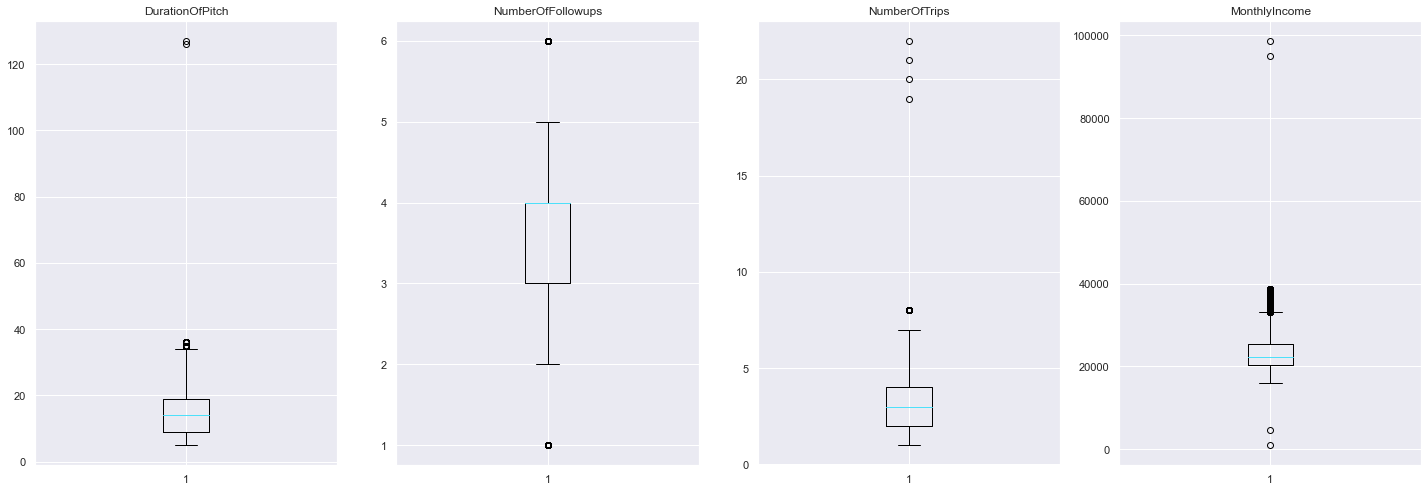

<IPython.core.display.Javascript object>

In [97]:
# Boxplots of numerical columns to view the outliers

plt.figure(figsize=(20, 7))

for i, variable in enumerate(num_col):
    plt.subplot(1, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Outlier Treatment

- As seen in the EDA, the columns DurationOfPitch, NumberOfFollowups, NumberOfTrips and MonthlyIncome columns have outliers. However, I choose not to treat the outliers as in real life the data will have outliers and I want the model learn the variations in the data distribution. Also, the **Bagging and Boosting** algorithms are robust and they can handle outliers.

# Model Building

## Data Preparation

- Since the objective is to build models on data of the existing customers which can be used to target new customers, we can drop the customer interaction data from the dataset as those features will not be available for new customers.
- Also, CustomerID will not be of much help in model building and hence dropping that too.

In [98]:
data.drop(
    [
        "CustomerID",
        "DurationOfPitch",
        "NumberOfFollowups",
        "ProductPitched",
        "PitchSatisfactionScore",
    ],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [99]:
# Checking the overall information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   Occupation                4888 non-null   category
 5   Gender                    4888 non-null   category
 6   NumberOfPersonVisiting    4888 non-null   int64   
 7   PreferredPropertyStar     4888 non-null   float64 
 8   MaritalStatus             4888 non-null   category
 9   NumberOfTrips             4888 non-null   float64 
 10  Passport                  4888 non-null   int64   
 11  OwnCar                    4888 non-null   int64   
 12  NumberOfChildrenVisiting  4888 non-null   float64 
 13  Designation               4888 non-null   catego

<IPython.core.display.Javascript object>

In [100]:
# As seen in the EDA, the distribution of City Tier can be treated as a category. Therefore doing the same

data["CityTier"] = data["CityTier"].astype("category")

<IPython.core.display.Javascript object>

In [101]:
# checking the dataset again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   Occupation                4888 non-null   category
 5   Gender                    4888 non-null   category
 6   NumberOfPersonVisiting    4888 non-null   int64   
 7   PreferredPropertyStar     4888 non-null   float64 
 8   MaritalStatus             4888 non-null   category
 9   NumberOfTrips             4888 non-null   float64 
 10  Passport                  4888 non-null   int64   
 11  OwnCar                    4888 non-null   int64   
 12  NumberOfChildrenVisiting  4888 non-null   float64 
 13  Designation               4888 non-null   catego

<IPython.core.display.Javascript object>

- The dataset now consists of 6 category, 5 float and 4 integer type columns with no null values. The dataset is now ready for model building

## Split Data

In [102]:
X = data.drop(["ProdTaken"], axis=1)
y = data["ProdTaken"]

# creating dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# splitting the data into train and test sets
# using 'stratify' parameter as the distribution of the target classes is imbalanced
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [103]:
print("Shape of Training set :", X_train.shape)
print("Shape of test set :", X_test.shape)
print("\n Percentage of classes in training set :")
print(y_train.value_counts(normalize=True))
print("\n Percentage of classes in test set :")
print(y_test.value_counts(normalize=True))

Shape of Training set : (3421, 22)
Shape of test set : (1467, 22)

 Percentage of classes in training set :
0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64

 Percentage of classes in test set :
0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

## Model evaluation criterion

#### Model can make wrong predictions such as :

1. Predicting a customer will purchase a travel package but in reality the customer does not purchase one.
2. Predicting a customer will not purchase a travel package but in reality the customer will purchase the travel package.

#### Prediction of concern :

The second prediction is our major concern as the 'Visit With Us' travel company plans to launch a new tourism package and wants to harness the available data to make the marketing expenditure more efficient. In order to do so, mistakes in the second prediction (i.e. False negatives) have to be considerably reduced.

#### How to reduce False Negatives :

Recall score should be maximized. Greater the Recall score, higher the chances of predicting the potential customers who may purchase the new travel package.

In [104]:
# defining a function to plot the confusion matrix to visualize the model performance


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [105]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
    return df_perf

<IPython.core.display.Javascript object>

# Model Building - Bagging 

## Decision Tree

####  with default parameters

In [106]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

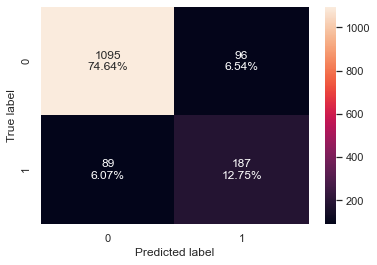

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [108]:
dtree_train_perf = model_performance_classification(dtree, X_train, y_train)
dtree_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [109]:
dtree_test_perf = model_performance_classification(dtree, X_test, y_test)
dtree_test_perf

,Accuracy,Recall,Precision,F1
0,0.873892,0.677536,0.660777,0.669052


<IPython.core.display.Javascript object>

- The decision tree is fully grown, hence overfitting

#### Hyperparameter tuning

In [110]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.82}, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [1, 4, 7, 15],
    "min_samples_leaf": [2, 3, 5],
    "max_leaf_nodes": [5, 7, 10, 15],
}

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=7,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=1)

<IPython.core.display.Javascript object>

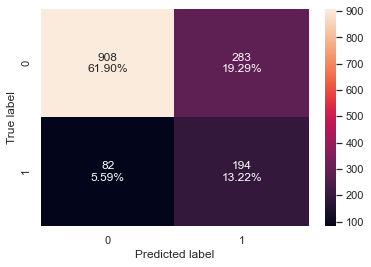

<IPython.core.display.Javascript object>

In [111]:
confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

In [112]:
dtree_tuned_train_perf = model_performance_classification(dtree_tuned, X_train, y_train)
dtree_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.748027,0.681677,0.400547,0.504598


<IPython.core.display.Javascript object>

In [113]:
dtree_tuned_test_perf = model_performance_classification(dtree_tuned, X_test, y_test)
dtree_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.751193,0.702899,0.406709,0.515272


<IPython.core.display.Javascript object>

- The model is generalising well with tuned parameters

### Visualizing the Decision Tree

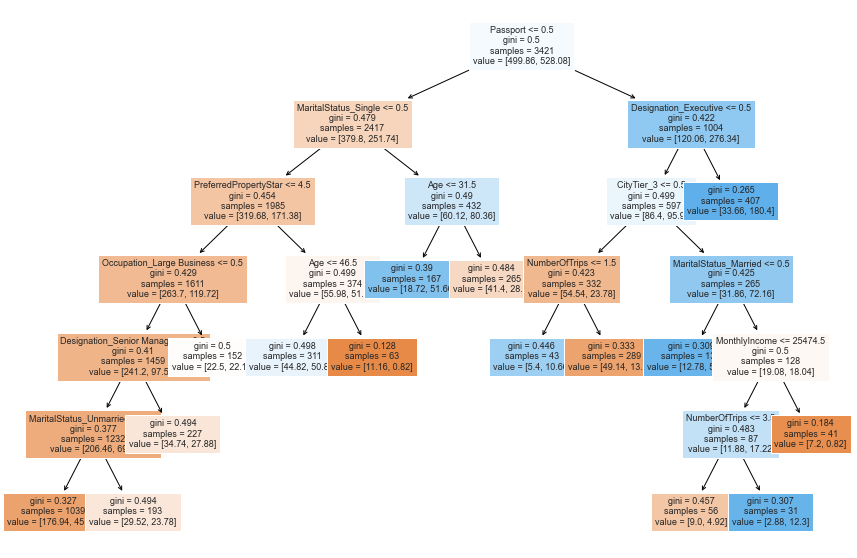

<IPython.core.display.Javascript object>

In [114]:
# creating a list of column names
feature_names = X_train.columns.to_list()

plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    dtree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [115]:
# Importance of features in the tree building
print(
    pd.DataFrame(
        dtree_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
Passport                    0.326999
Designation_Executive       0.148713
CityTier_3                  0.102444
Age                         0.090151
MaritalStatus_Single        0.081878
NumberOfTrips               0.062316
MaritalStatus_Married       0.037525
MaritalStatus_Unmarried     0.037365
PreferredPropertyStar       0.035611
Designation_Senior Manager  0.028601
Occupation_Large Business   0.025697
MonthlyIncome               0.022701
NumberOfPersonVisiting      0.000000
Occupation_Salaried         0.000000
Occupation_Small Business   0.000000
Gender_Male                 0.000000
CityTier_2                  0.000000
TypeofContact_Self Enquiry  0.000000
NumberOfChildrenVisiting    0.000000
Designation_Manager         0.000000
OwnCar                      0.000000
Designation_VP              0.000000


<IPython.core.display.Javascript object>

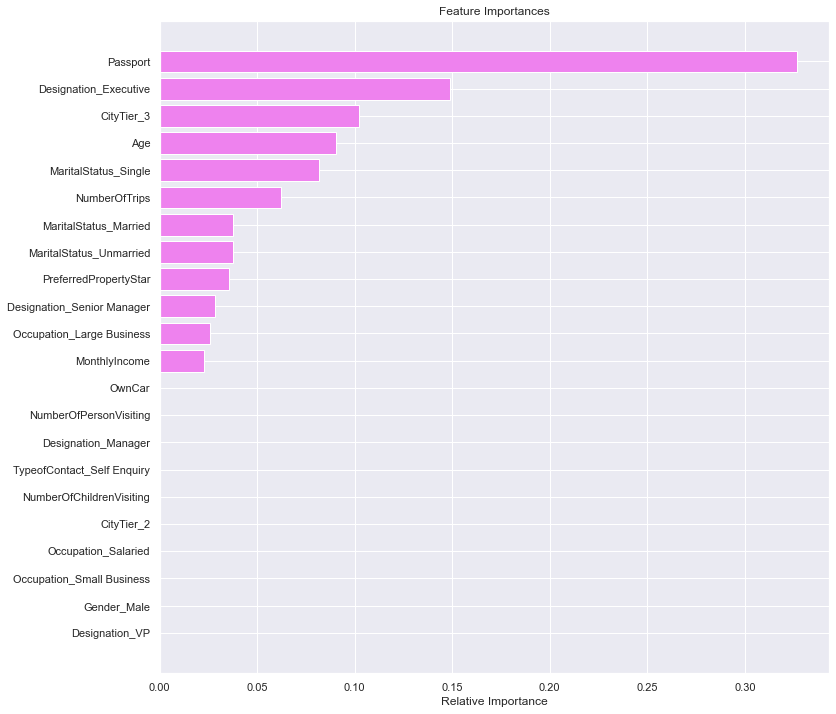

<IPython.core.display.Javascript object>

In [116]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Passport feature is given highest importance in tree building followed by Designation_Executive, CityTier3 and Age

## Bagging Classifier

#### with default parameters

In [117]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

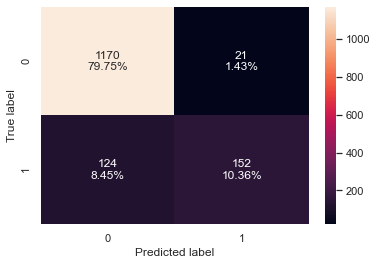

<IPython.core.display.Javascript object>

In [118]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [119]:
bagging_train_perf = model_performance_classification(bagging, X_train, y_train)
bagging_train_perf

,Accuracy,Recall,Precision,F1
0,0.9924,0.962733,0.996785,0.979463


<IPython.core.display.Javascript object>

In [120]:
bagging_test_perf = model_performance_classification(bagging, X_test, y_test)
bagging_test_perf

,Accuracy,Recall,Precision,F1
0,0.901159,0.550725,0.878613,0.67706


<IPython.core.display.Javascript object>

- Bagging classifier is overfitting on the training set and performing poorly on the test set in terms of Recall

#### With Hypertuned Decision Tree as base estimator

In [121]:
bagging_dtree_tuned = BaggingClassifier(base_estimator=dtree_tuned, random_state=1)
bagging_dtree_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.18,
                                                                      1: 0.82},
                                                        max_depth=7,
                                                        max_leaf_nodes=15,
                                                        min_samples_leaf=2,
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

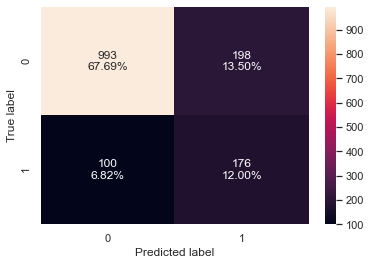

<IPython.core.display.Javascript object>

In [122]:
confusion_matrix_sklearn(bagging_dtree_tuned, X_test, y_test)

In [123]:
bagging_dtree_tuned_train_perf = model_performance_classification(
    bagging_dtree_tuned, X_train, y_train
)
bagging_dtree_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.802105,0.673913,0.481687,0.561812


<IPython.core.display.Javascript object>

In [124]:
bagging_dtree_tuned_test_perf = model_performance_classification(
    bagging_dtree_tuned, X_test, y_test
)
bagging_dtree_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.796864,0.637681,0.470588,0.541538


<IPython.core.display.Javascript object>

- Bagging classifier with tuned decision tree as the base estimator is giving a genralized model. The metrics are still low. Must try hyperparameter tuning to check for better Recall on the test data

#### Hyperparameter Tuning

- Hypertuning the bagging classifier with tuned decision tree as base estimator since it is giving a more generalized model

In [125]:
# grid search for bagging classifier
cl1 = dtree_tuned
param_grid = {
    "base_estimator": [cl1],
    "max_samples": [0.7, 0.8, 0.9, 1],
    "n_estimators": [5, 7, 10, 15, 20, 30, 40, 51, 101],
    "max_features": [0.7, 0.8, 0.9, 1],
}

grid = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=param_grid,
    scoring="recall",
    cv=5,
)
grid.fit(X_train, y_train)

# getting the best estimator
bagging_tuned = grid.best_estimator_
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.18,
                                                                      1: 0.82},
                                                        max_depth=7,
                                                        max_leaf_nodes=15,
                                                        min_samples_leaf=2,
                                                        random_state=1),
                  max_features=1, max_samples=0.8, n_estimators=51,
                  random_state=1)

<IPython.core.display.Javascript object>

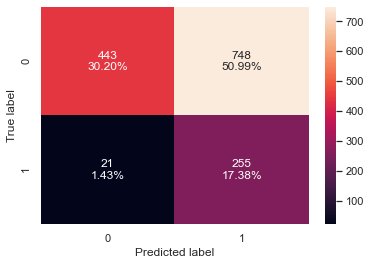

<IPython.core.display.Javascript object>

In [126]:
confusion_matrix_sklearn(bagging_tuned, X_test, y_test)

In [127]:
bagging_tuned_train_perf = model_performance_classification(
    bagging_tuned, X_train, y_train
)
bagging_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.486407,0.889752,0.253652,0.394764


<IPython.core.display.Javascript object>

In [128]:
bagging_tuned_test_perf = model_performance_classification(
    bagging_tuned, X_test, y_test
)
bagging_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.475801,0.923913,0.254237,0.398749


<IPython.core.display.Javascript object>

- Tuned bagging classifier is giving a generalized model with a very good Recall scores in both train and test sets. However, it is performing poorly in terms of Precision score

## Random Forest

#### with default parameters

In [129]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

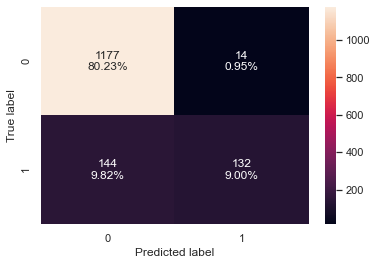

<IPython.core.display.Javascript object>

In [130]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [132]:
rf_train_perf = model_performance_classification(rf, X_train, y_train)
rf_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [133]:
rf_test_perf = model_performance_classification(rf, X_test, y_test)
rf_test_perf

,Accuracy,Recall,Precision,F1
0,0.892297,0.478261,0.90411,0.625592


<IPython.core.display.Javascript object>

- Random Forest is overfitting on the training data and is performing poorly on the test data in terms of Recall

#### Hyperparameter tuning

In [134]:
# Choose the type of classifier
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

<IPython.core.display.Javascript object>

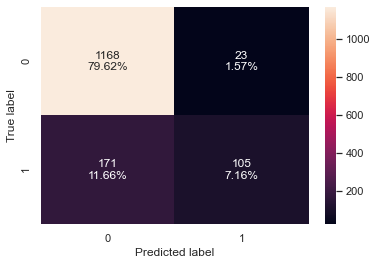

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [136]:
rf_tuned_train_perf = model_performance_classification(rf_tuned, X_train, y_train)
rf_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.890968,0.476708,0.895044,0.622087


<IPython.core.display.Javascript object>

In [137]:
rf_tuned_test_perf = model_performance_classification(rf_tuned, X_test, y_test)
rf_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.867757,0.380435,0.820312,0.519802


<IPython.core.display.Javascript object>

- Tuned random forest model is generalizing in comparison to the model with default parameters. However, it is performing poorly in terms of the Recall score

### Feature importance of Random Forest

In [138]:
# Importance of features in the tree building
print(
    pd.DataFrame(
        rf_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                 Imp
MonthlyIncome               0.168559
Age                         0.163165
Passport                    0.125014
NumberOfTrips               0.073836
Designation_Executive       0.068871
CityTier_3                  0.049276
PreferredPropertyStar       0.049072
MaritalStatus_Single        0.045958
Gender_Male                 0.027875
NumberOfChildrenVisiting    0.026062
TypeofContact_Self Enquiry  0.025313
MaritalStatus_Unmarried     0.025219
NumberOfPersonVisiting      0.024310
MaritalStatus_Married       0.023543
OwnCar                      0.022036
Occupation_Small Business   0.018663
Occupation_Salaried         0.017549
Designation_Manager         0.015606
Occupation_Large Business   0.013202
Designation_Senior Manager  0.010424
CityTier_2                  0.005257
Designation_VP              0.001189


<IPython.core.display.Javascript object>

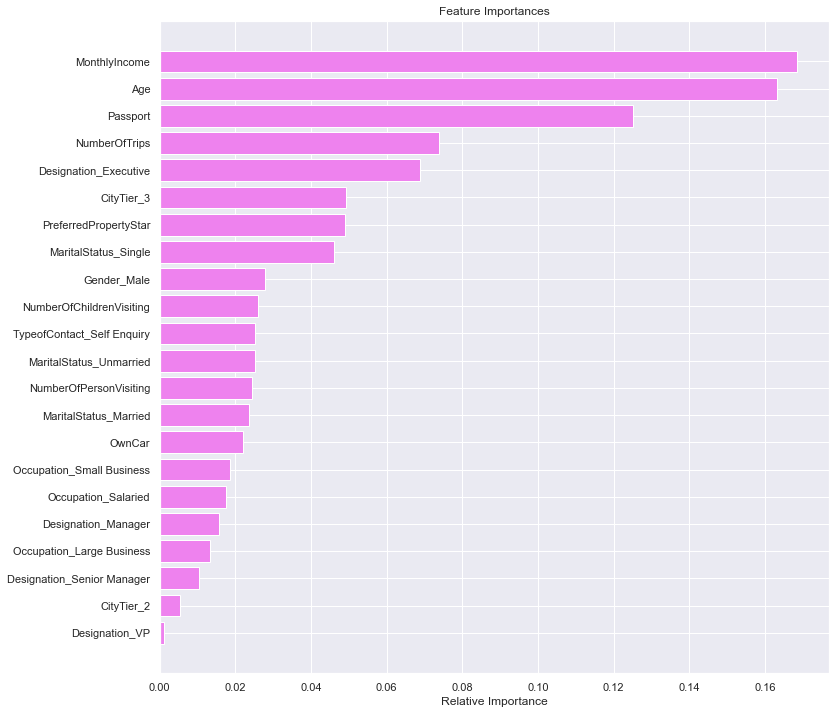

<IPython.core.display.Javascript object>

In [139]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Random Forest Classifier has given highest importance to Monthly Income and Age
- Followed by Passport, Number of trips and Designation_Executive
- Designation_VP has been given the least imortance

## Comparison of Models - Bagging

In [140]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_train_perf.T,
        dtree_tuned_train_perf.T,
        bagging_train_perf.T,
        bagging_dtree_tuned_train_perf.T,
        bagging_tuned_train_perf.T,
        rf_train_perf.T,
        rf_tuned_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier with dtree_tuned base estimator",
    "Bagging Classifier Tuned",
    "Random Forest",
    "Random Forest Tuned",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier with dtree_tuned base estimator,Bagging Classifier Tuned,Random Forest,Random Forest Tuned
Accuracy,1.0,0.748027,0.992400,0.802105,0.486407,1.0,0.890968
Recall,1.0,0.681677,0.962733,0.673913,0.889752,1.0,0.476708
Precision,1.0,0.400547,0.996785,0.481687,0.253652,1.0,0.895044
F1,1.0,0.504598,0.979463,0.561812,0.394764,1.0,0.622087


<IPython.core.display.Javascript object>

In [141]:
# testing performance comparison

bagging_models_test_comp_df = pd.concat(
    [
        dtree_test_perf.T,
        dtree_tuned_test_perf.T,
        bagging_test_perf.T,
        bagging_dtree_tuned_test_perf.T,
        bagging_tuned_test_perf.T,
        rf_test_perf.T,
        rf_tuned_test_perf.T,
    ],
    axis=1,
)
bagging_models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier with dtree_tuned base estimator",
    "Bagging Classifier Tuned",
    "Random Forest",
    "Random Forest Tuned",
]
print("\nTesting performance comparison:")
bagging_models_test_comp_df


Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier with dtree_tuned base estimator,Bagging Classifier Tuned,Random Forest,Random Forest Tuned
Accuracy,0.873892,0.751193,0.901159,0.796864,0.475801,0.892297,0.867757
Recall,0.677536,0.702899,0.550725,0.637681,0.923913,0.478261,0.380435
Precision,0.660777,0.406709,0.878613,0.470588,0.254237,0.904110,0.820312
F1,0.669052,0.515272,0.677060,0.541538,0.398749,0.625592,0.519802


<IPython.core.display.Javascript object>

## Model Performance - Observations (Bagging)

- Overfit models - Desicion tree, Bagging Classifier and Random Forest
- Generalized models - Tuned decision tree, Bagging Classifier with tuned decision tree as the base estimator, tuned Bagging Classifier and tuned Random Forest models
- Tuned Bagging Classifier gives the highest Recall in the test set
- The business may choose tuned Decision Tree for a good Recall with a better Precision score

# Model Building - Boosting

## AdaBoost Classifier

#### With default parameters

In [142]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

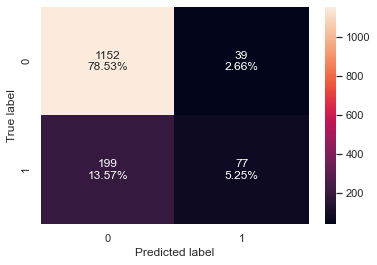

<IPython.core.display.Javascript object>

In [143]:
confusion_matrix_sklearn(abc, X_test, y_test)

In [145]:
abc_train_perf = model_performance_classification(abc, X_train, y_train)
abc_train_perf

,Accuracy,Recall,Precision,F1
0,0.841859,0.270186,0.710204,0.391451


<IPython.core.display.Javascript object>

In [146]:
abc_test_perf = model_performance_classification(abc, X_test, y_test)
abc_test_perf

,Accuracy,Recall,Precision,F1
0,0.837764,0.278986,0.663793,0.392857


<IPython.core.display.Javascript object>

- AdaBoost is generalizing well but it is giving very poor performance in terms of Recall

#### Hyperparameter tuning

In [147]:
# choose the type of classifier
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters
parameters = {  # trying different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": [100],  # np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

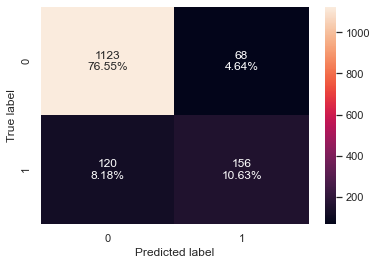

<IPython.core.display.Javascript object>

In [148]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [149]:
abc_tuned_train_perf = model_performance_classification(abc_tuned, X_train, y_train)
abc_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.972523,0.885093,0.966102,0.923825


<IPython.core.display.Javascript object>

In [150]:
abc_tuned_test_perf = model_performance_classification(abc_tuned, X_test, y_test)
abc_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.871847,0.565217,0.696429,0.624


<IPython.core.display.Javascript object>

- Tuned adaboost classifier is overfitting on the trainind data. However, Recall has improved in comparison to the model with default parameters

In [151]:
# Importance of features in the tree building
print(
    pd.DataFrame(
        abc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                     Imp
MonthlyIncome               4.298208e-01
Age                         1.590463e-01
NumberOfTrips               7.374568e-02
PreferredPropertyStar       3.873415e-02
Gender_Male                 3.446521e-02
CityTier_3                  2.862008e-02
TypeofContact_Self Enquiry  2.552513e-02
Designation_Senior Manager  2.339200e-02
NumberOfChildrenVisiting    2.282212e-02
Passport                    2.050527e-02
MaritalStatus_Single        1.889840e-02
NumberOfPersonVisiting      1.661858e-02
OwnCar                      1.659007e-02
Designation_Manager         1.478678e-02
MaritalStatus_Unmarried     1.319966e-02
Designation_Executive       1.235855e-02
Occupation_Small Business   1.098494e-02
Occupation_Salaried         1.044172e-02
Occupation_Large Business   1.020640e-02
CityTier_2                  1.002232e-02
MaritalStatus_Married       9.215848e-03
Designation_VP              1.357684e-10


<IPython.core.display.Javascript object>

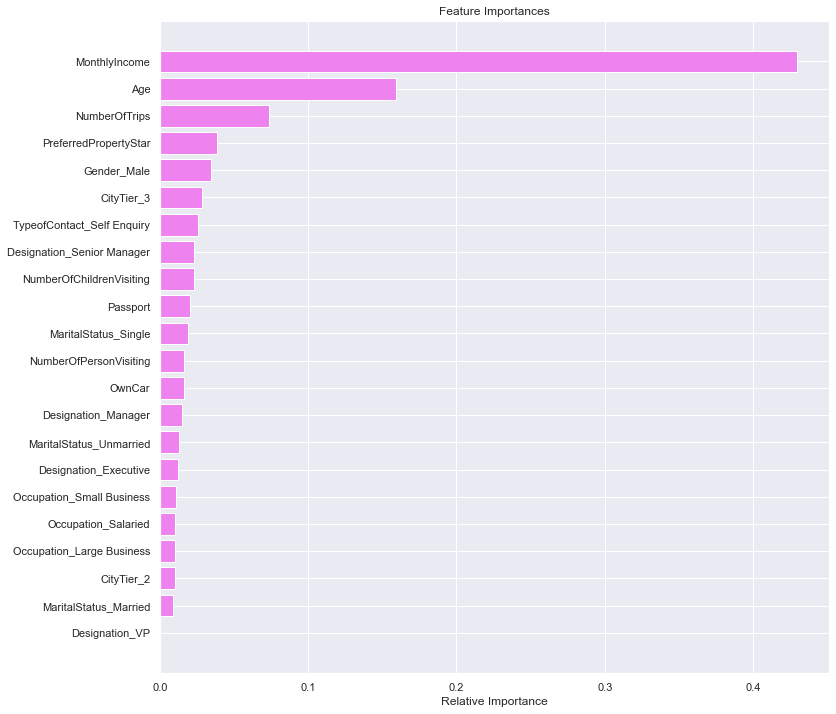

<IPython.core.display.Javascript object>

In [152]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Monthly Income is given the highest feature importance by the tuned Adaboost classifier, followed by Age and Number of trips. 
- Passport, which was given much higher importance by the Bagging models is given lower importance here

## Gradient Boosting Classifier

#### With default parameters

In [153]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

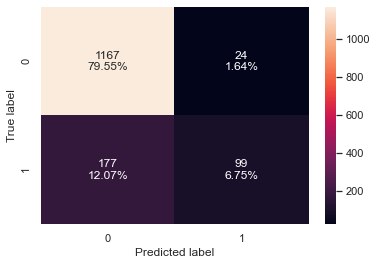

<IPython.core.display.Javascript object>

In [154]:
confusion_matrix_sklearn(gbc, X_test, y_test)

In [155]:
gbc_train_perf = model_performance_classification(gbc, X_train, y_train)
gbc_train_perf

,Accuracy,Recall,Precision,F1
0,0.879275,0.428571,0.859813,0.572021


<IPython.core.display.Javascript object>

In [156]:
gbc_test_perf = model_performance_classification(gbc, X_test, y_test)
gbc_test_perf

,Accuracy,Recall,Precision,F1
0,0.862986,0.358696,0.804878,0.496241


<IPython.core.display.Javascript object>

- The model is giving generalized scores on train and test sets. The Recall score is better than the Adaboost model with default parameters.

#### Hyperparameter tuning

- Hyperparameter tuning the gradient boost model with AdaBoost Classifier as the base estimator as it gave a generalized model

In [157]:
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

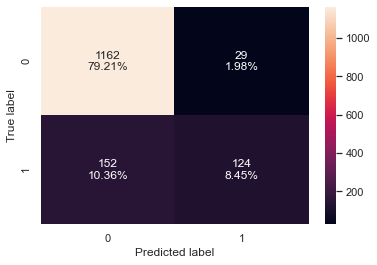

<IPython.core.display.Javascript object>

In [158]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [159]:
gbc_tuned_train_perf = model_performance_classification(gbc_tuned, X_train, y_train)
gbc_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.903829,0.546584,0.904884,0.68151


<IPython.core.display.Javascript object>

In [160]:
gbc_tuned_test_perf = model_performance_classification(gbc_tuned, X_test, y_test)
gbc_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.876619,0.449275,0.810458,0.578089


<IPython.core.display.Javascript object>

- Recall has improved a little compared to the model with default parameters

In [161]:
# Importance of features in the tree building
print(
    pd.DataFrame(
        gbc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
MonthlyIncome               0.227266
Age                         0.158714
Passport                    0.138648
Designation_Executive       0.103982
NumberOfTrips               0.056358
CityTier_3                  0.052872
MaritalStatus_Single        0.049712
PreferredPropertyStar       0.040302
MaritalStatus_Unmarried     0.034473
Designation_Manager         0.020868
Designation_Senior Manager  0.019875
CityTier_2                  0.018471
Occupation_Large Business   0.013756
TypeofContact_Self Enquiry  0.011762
MaritalStatus_Married       0.011186
Gender_Male                 0.010889
NumberOfPersonVisiting      0.008886
Occupation_Salaried         0.006268
NumberOfChildrenVisiting    0.005418
Occupation_Small Business   0.004810
OwnCar                      0.004437
Designation_VP              0.001048


<IPython.core.display.Javascript object>

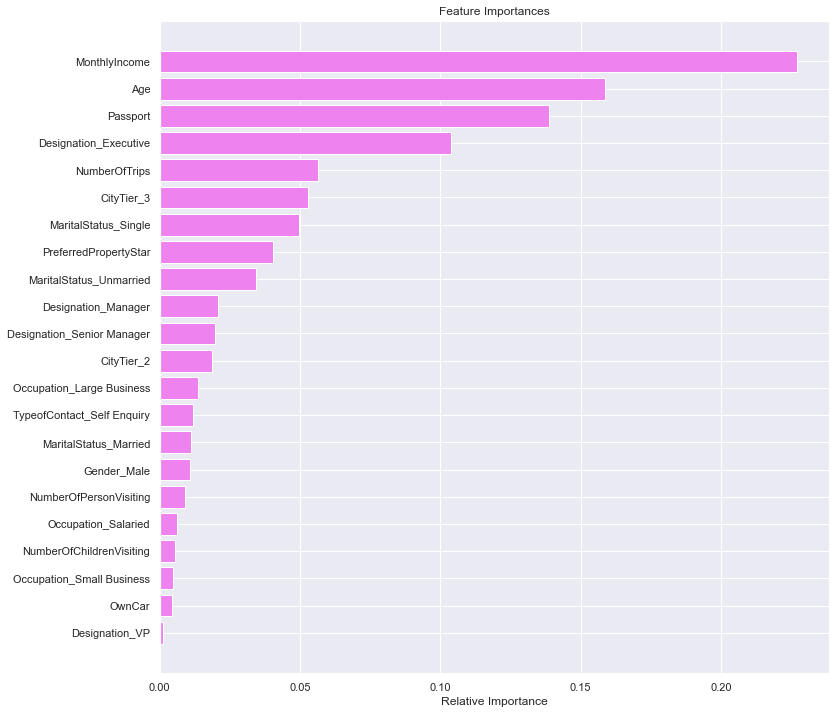

<IPython.core.display.Javascript object>

In [162]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The feature with highest importance are same as the feature importances given by the tuned Random Forest model

## XGBoost Classifier

#### Default parameter

In [163]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

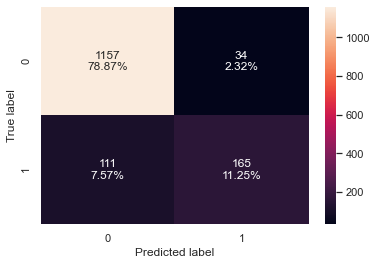

<IPython.core.display.Javascript object>

In [164]:
confusion_matrix_sklearn(xgb, X_test, y_test)

In [165]:
xgb_train_perf = model_performance_classification(xgb, X_train, y_train)
xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.997662,0.987578,1.0,0.99375


<IPython.core.display.Javascript object>

In [166]:
xgb_test_perf = model_performance_classification(xgb, X_test, y_test)
xgb_test_perf

,Accuracy,Recall,Precision,F1
0,0.901159,0.597826,0.829146,0.694737


<IPython.core.display.Javascript object>

- XGBoost with default paramerts is overfitting on the training data and is giving a low Recall score on the test data

#### Hyperparameter tuning

In [167]:
# choose the type of classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters
parameters = {
    "n_estimators": np.arange(50, 100, 20),
    "scale_pos_weight": [5],
    "subsample": [0.9, 1],
    "learning_rate": [0.1],
    "gamma": [3],
    "colsample_bytree": [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 0.9, 1],
}

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

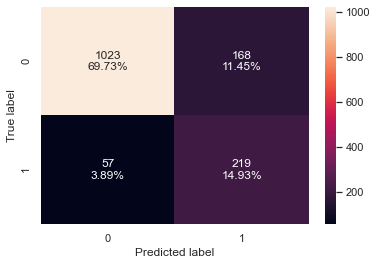

<IPython.core.display.Javascript object>

In [168]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [169]:
xgb_tuned_train_perf = model_performance_classification(xgb_tuned, X_train, y_train)
xgb_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.918737,0.958075,0.710829,0.816138


<IPython.core.display.Javascript object>

In [170]:
xgb_tuned_test_perf = model_performance_classification(xgb_tuned, X_test, y_test)
xgb_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.846626,0.793478,0.565891,0.660633


<IPython.core.display.Javascript object>

- The model is overfit a little
- However, hyperparamter tuned XGBoost classifier is giving the highest Recall highest amongst all the Boosting algorithms

In [171]:
# Importance of features in the tree building
print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
Passport                    0.145018
MaritalStatus_Single        0.072927
Designation_Executive       0.071501
CityTier_3                  0.070270
Designation_Manager         0.057402
MaritalStatus_Married       0.053599
MaritalStatus_Unmarried     0.044430
PreferredPropertyStar       0.043555
CityTier_2                  0.039456
Age                         0.038973
Occupation_Large Business   0.037029
NumberOfTrips               0.035638
MonthlyIncome               0.035622
Occupation_Salaried         0.034689
Designation_VP              0.030545
Gender_Male                 0.029909
TypeofContact_Self Enquiry  0.029524
Designation_Senior Manager  0.029383
Occupation_Small Business   0.028348
OwnCar                      0.025402
NumberOfPersonVisiting      0.023748
NumberOfChildrenVisiting    0.023033


<IPython.core.display.Javascript object>

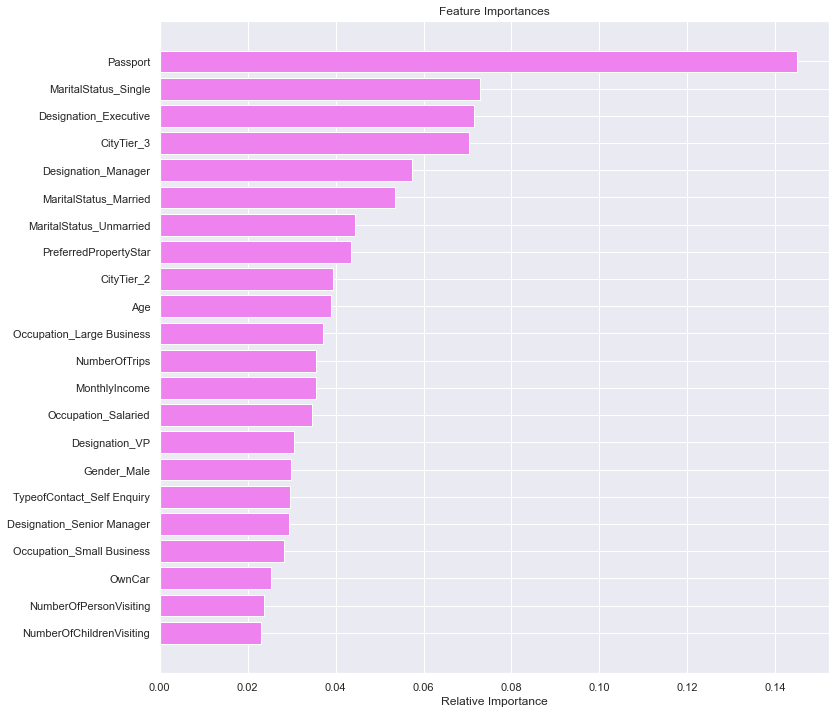

<IPython.core.display.Javascript object>

In [172]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Passport is given the highset feature importance by the tuned XGBoost classifier
- MaritalStatus_Single, Designation_Executive and CityTier_3 are given second highest importance

## Stacking Classifier

In [173]:
# Building a stacking model with tuned random forest, bagging classifier, tuned gradient boosting classifier and tuned XGBoost classifier as the final predictor

estimators = [
    ("Random Forest tuned", rf_tuned),
    ("Bagging Classifier", bagging),
    ("Gradient Boosting Tuned", gbc_tuned),
]
final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest tuned',
                                RandomForestClassifier(max_features=0.5000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=150,
                                                       random_state=1)),
                               ('Bagging Classifier',
                                BaggingClassifier(random_state=1)),
                               ('Gradient Boosting Tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_feature...
                                                 eval_metric='logloss', gamma=3,
                                                 gpu_id=-1,
                                                 impo

<IPython.core.display.Javascript object>

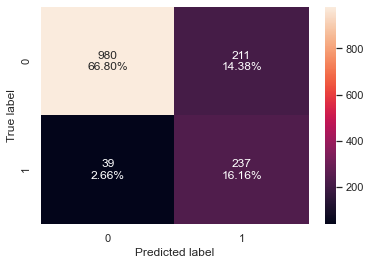

<IPython.core.display.Javascript object>

In [175]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [176]:
stacking_train_perf = model_performance_classification(
    stacking_classifier, X_train, y_train
)
stacking_train_perf

,Accuracy,Recall,Precision,F1
0,0.933061,0.996894,0.73878,0.848645


<IPython.core.display.Javascript object>

In [177]:
stacking_test_perf = model_performance_classification(
    stacking_classifier, X_test, y_test
)
stacking_test_perf

,Accuracy,Recall,Precision,F1
0,0.829584,0.858696,0.529018,0.654696


<IPython.core.display.Javascript object>

- The model is a little overfit
- However, Stacking classifier is giving the highest Recall in the test set

## Comparison of Models - Boosting

In [178]:
# training performance comparison

boosting_models_train_comp_df = pd.concat(
    [
        abc_train_perf.T,
        abc_tuned_train_perf.T,
        gbc_train_perf.T,
        gbc_tuned_train_perf.T,
        xgb_train_perf.T,
        xgb_tuned_train_perf.T,
        stacking_train_perf.T,
    ],
    axis=1,
)
boosting_models_train_comp_df.columns = [
    "AdaBoost Classifier",
    "AdaBoost Classifier Tuned",
    "Gradient Boosting Classifier",
    "Gradient Boosting Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
boosting_models_train_comp_df

Training performance comparison:


,AdaBoost Classifier,AdaBoost Classifier Tuned,Gradient Boosting Classifier,Gradient Boosting Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.841859,0.972523,0.879275,0.903829,0.997662,0.918737,0.933061
Recall,0.270186,0.885093,0.428571,0.546584,0.987578,0.958075,0.996894
Precision,0.710204,0.966102,0.859813,0.904884,1.000000,0.710829,0.738780
F1,0.391451,0.923825,0.572021,0.681510,0.993750,0.816138,0.848645


<IPython.core.display.Javascript object>

In [179]:
# testing performance comparison

boosting_models_test_comp_df = pd.concat(
    [
        abc_test_perf.T,
        abc_tuned_test_perf.T,
        gbc_test_perf.T,
        gbc_tuned_test_perf.T,
        xgb_test_perf.T,
        xgb_tuned_test_perf.T,
        stacking_test_perf.T,
    ],
    axis=1,
)
boosting_models_test_comp_df.columns = [
    "AdaBoost Classifier",
    "AdaBoost Classifier Tuned",
    "Gradient Boosting Classifier",
    "Gradient Boosting Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
boosting_models_test_comp_df

Training performance comparison:


,AdaBoost Classifier,AdaBoost Classifier Tuned,Gradient Boosting Classifier,Gradient Boosting Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.837764,0.871847,0.862986,0.876619,0.901159,0.846626,0.829584
Recall,0.278986,0.565217,0.358696,0.449275,0.597826,0.793478,0.858696
Precision,0.663793,0.696429,0.804878,0.810458,0.829146,0.565891,0.529018
F1,0.392857,0.624000,0.496241,0.578089,0.694737,0.660633,0.654696


<IPython.core.display.Javascript object>

## Model Performance - Observations (Boosting)

- AdaBoost classifier and Gradient Boost Classifier are most generalized models but, they perform poorly in terms of Recall 
- XGBoost and Stacking models are little overfit but they are giving the highest Recall scores in the test set
- We can also look into tuning the XGBoost classifier with different parameters and stacking classifier with different weak learners to get more generalized models
- Business may choose the stacking model for highest Recall or tuned XGBoost model for a higher Recall with a little better Precision score

**Note** : Have not added class_weight for Boosting algorithms as they gave much lower Recall scores while tuning

# Business Insights and Recommendations

- The business can use this predictive model to 
    - identify potential customers who may purchase the travel packages
    - potential new customers who may purchase the packages that are offered / packages that are newly launched
    - the features that drive the customer to buy the package
- Features that impact Product taken - Passport, Designation, Marital Status, City Tier, Monthly Income, Age and Number of trips annually
    - customers who own a passport show more interesting in buying the product
    - customers with Designation Executive, Marital Status single and City Tier 3 should be our target customers
    - customers with Monthly Income 15K to 25K, Age 25 to 40 show more interest in buying a travel package
    - larger the number of trips taken by a customer annually, higher is the chances of customer buying the package
- The marketing team should focus on 
    - higher duration of pitch by salesperson with the customer
    - do multiple followups with the customer
    - encourage customers to get passport
    - market and company invite customers for 'King' package 
- Once the 'Wellness Package' is launched, the business can collect data on customer information, their preference, product satisfaction and customer interaction so as to enable data analysis for better results